In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import glob, os

#set max display columns to 500 so that all columns are visible when a dataframe is printed
pd.set_option('display.max_columns', 500)

## Load data in to Dataframe

In [2]:
#Load the current application data in to dataframe
applicationsData = pd.read_csv("application_data.csv")
applicationsData.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
#Routine check
applicationsData.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [4]:
applicationsData.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
applicationsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
applicationsData.shape

(307511, 122)

### Finding the missing values

In [7]:
#Finding the sum of Null values in each columns
applicationsData.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

From above evaluation it can be seen that there are column with many missing values. Some of the columns are having around 100k - 200k missing values. After analysing the business importance of these columns we can remove the columns.

Finding the % of missing values in each column : 

In [8]:
#calculating the % of null values
percent_missing = applicationsData.isnull().sum() * 100 / len(applicationsData)

# creating data frame with column names and their % Null values
missing_value_df = pd.DataFrame({'column_name': applicationsData.columns,
                                 'percent_missing': percent_missing})

# sorting the data frame
missing_value_df.sort_values('percent_missing', inplace=True)

In [9]:
pd.set_option('display.max_rows', 100)
# displaying the dataframe with % null values
missing_value_df

,column_name,percent_missing
SK_ID_CURR,SK_ID_CURR,0.000000
HOUR_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,0.000000
REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.000000
LIVE_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,0.000000
REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_LIVE_CITY,0.000000
REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.000000
LIVE_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,0.000000
ORGANIZATION_TYPE,ORGANIZATION_TYPE,0.000000
FLAG_DOCUMENT_21,FLAG_DOCUMENT_21,0.000000
FLAG_DOCUMENT_20,FLAG_DOCUMENT_20,0.000000


In this analysis, If Null Value % is more than 50%, its a high rate.
We will drop the columns those are having more than 50 % of Null Values.

In [10]:
dataframe_after_dropping_NAValues = missing_value_df.drop(missing_value_df[missing_value_df['percent_missing']>50.0].index)
dataframe_after_dropping_NAValues

,column_name,percent_missing
SK_ID_CURR,SK_ID_CURR,0.000000
HOUR_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,0.000000
REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.000000
LIVE_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,0.000000
REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_LIVE_CITY,0.000000
REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.000000
LIVE_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,0.000000
ORGANIZATION_TYPE,ORGANIZATION_TYPE,0.000000
FLAG_DOCUMENT_21,FLAG_DOCUMENT_21,0.000000
FLAG_DOCUMENT_20,FLAG_DOCUMENT_20,0.000000


In [11]:
missing_value_df_dropped_columns = missing_value_df[missing_value_df['percent_missing']>50.0]
missing_value_df_dropped_columns

,column_name,percent_missing
HOUSETYPE_MODE,HOUSETYPE_MODE,50.176091
LIVINGAREA_AVG,LIVINGAREA_AVG,50.193326
LIVINGAREA_MODE,LIVINGAREA_MODE,50.193326
LIVINGAREA_MEDI,LIVINGAREA_MEDI,50.193326
ENTRANCES_AVG,ENTRANCES_AVG,50.348768
ENTRANCES_MODE,ENTRANCES_MODE,50.348768
ENTRANCES_MEDI,ENTRANCES_MEDI,50.348768
APARTMENTS_MEDI,APARTMENTS_MEDI,50.749729
APARTMENTS_AVG,APARTMENTS_AVG,50.749729
APARTMENTS_MODE,APARTMENTS_MODE,50.749729


In [12]:
missing_value_df_dropped_columns.shape

(41, 2)

Here we can say that, Out of 122 columns, there are 41 columns where % of Null values is more than 50% and 81 columns where % Null values is less than 50%

#### Checking data types of columns in the original dataframe : 

In [13]:
### changing the data types where required. like Numeric to Categorical or Categorical to Numeric
applicationsData.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [14]:
applicationsData.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

#### From Describe function, we can see that column "TARGET" is mentioned as Numeric column whereas it should be Categorical column because "TARGET" column contains only two types of values 0 and 1.

In [15]:
## Now we will convert TARGET column to categorical column:
applicationsData['TARGET']=pd.Categorical(applicationsData.TARGET)

###### Apart from TARGET field there are other fields as well which are basically categorical and needs to be converted.
    FLAG_DOCUMENT_X(X= 2 to 21)
    FLAG_CONT_MOBILE

In [16]:
##to get the list of NUMBERIC column
numeric_cols = applicationsData.select_dtypes('number').columns.tolist()  
numeric_cols

['SK_ID_CURR',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 

In [17]:
##to get list of categorical columns
categ_cols = applicationsData.dtypes[applicationsData.dtypes != "object"].index
categ_cols

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)

In [18]:
## We just verified that TARGET column was Numeric column which is converted into Categorical column now
applicationsData.describe()  
## Now TARGET Field is moved to categorical. Hence, not coming up in Describe function

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.977752,0.755746,0.044595,0.07807

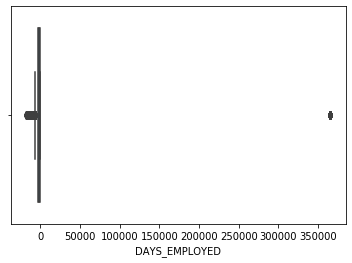

In [19]:
#numeric_cols
sns.boxplot(x=applicationsData['DAYS_EMPLOYED'])

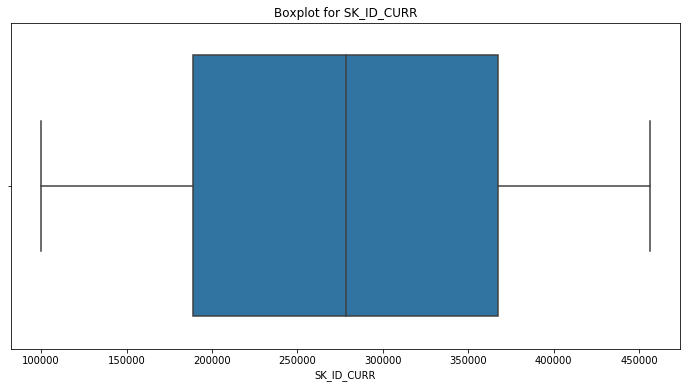

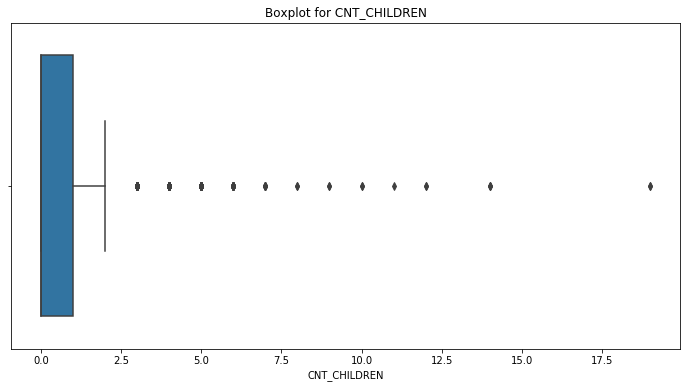

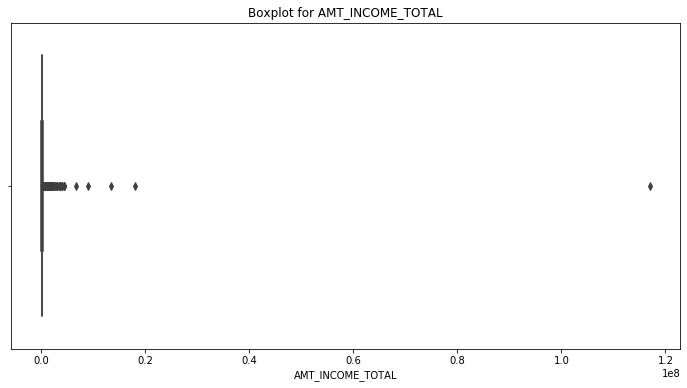

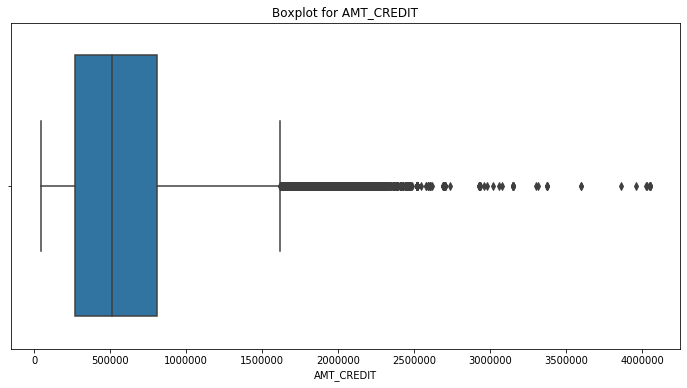

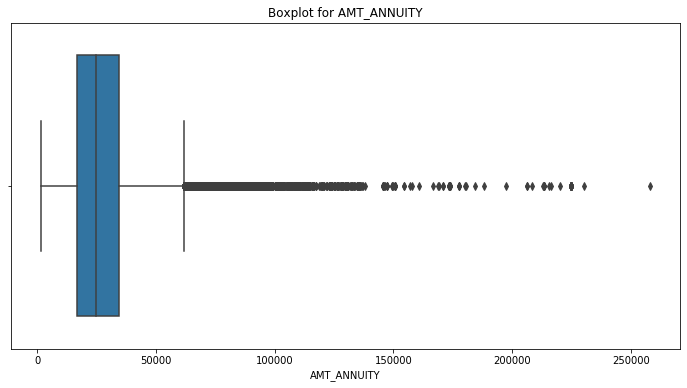

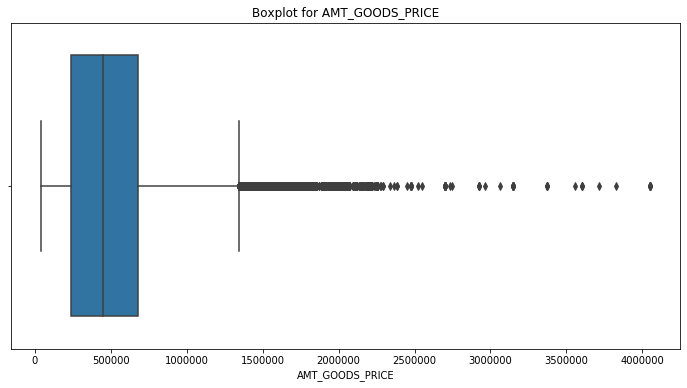

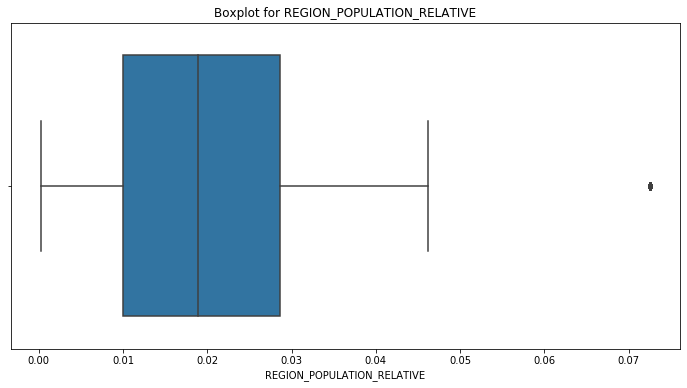

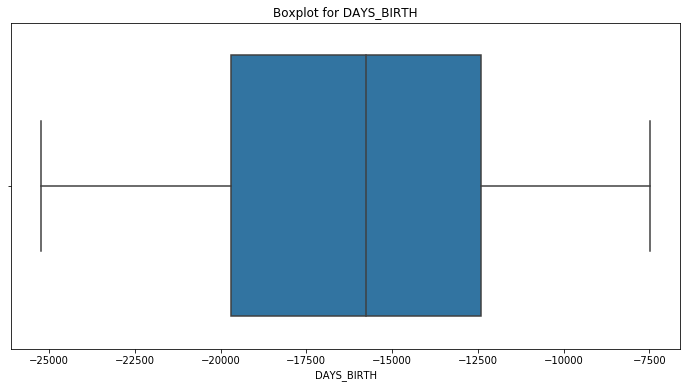

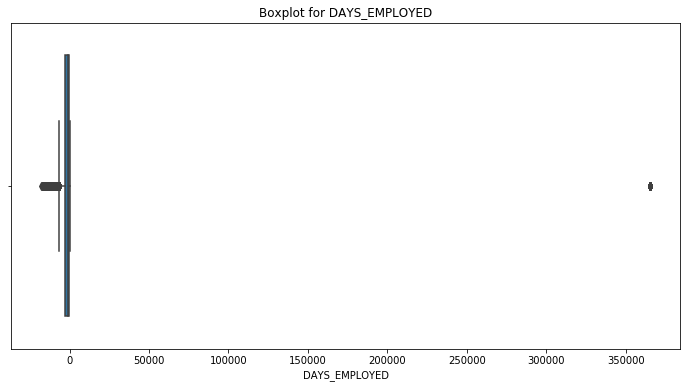

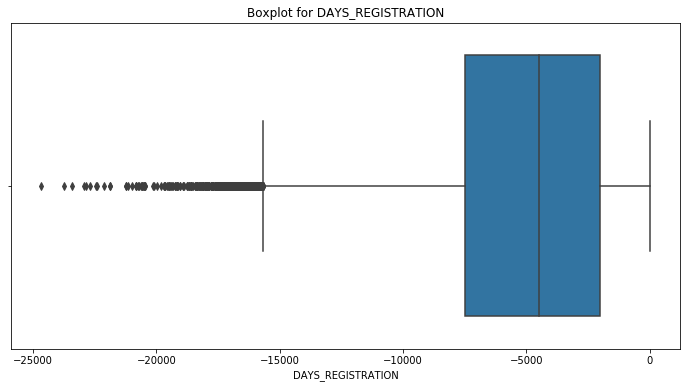

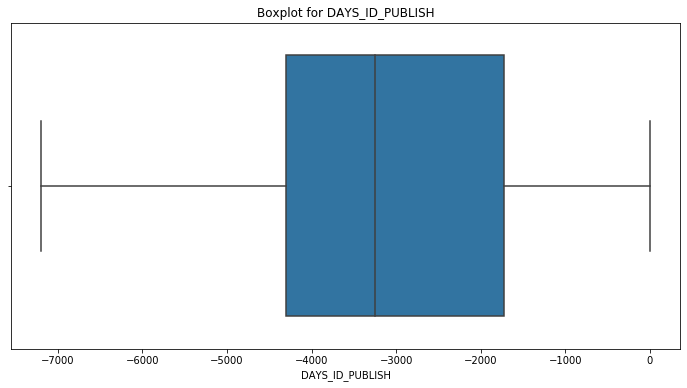

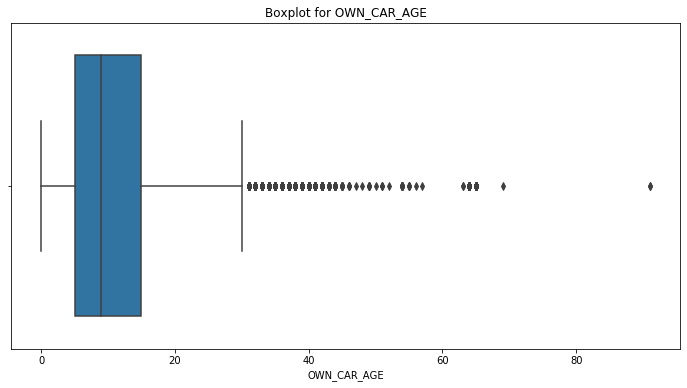

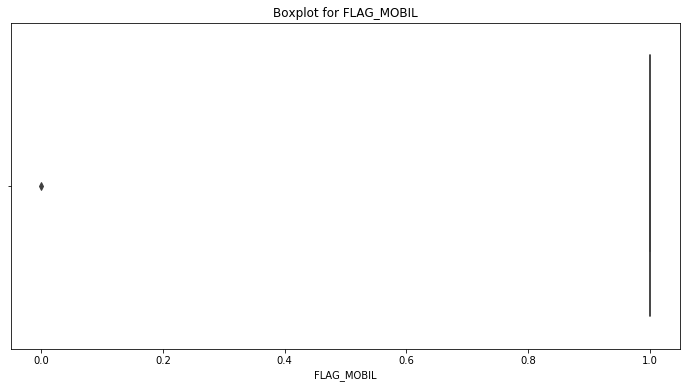

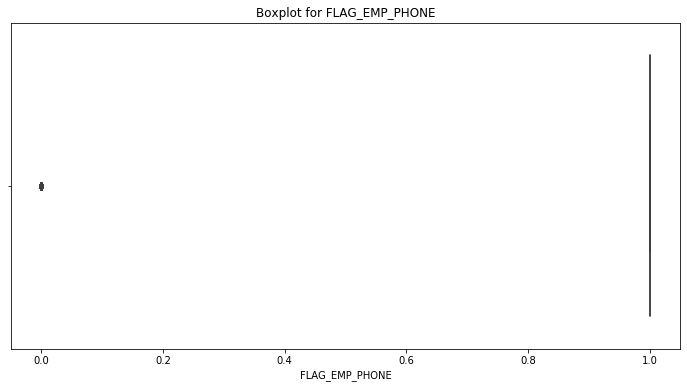

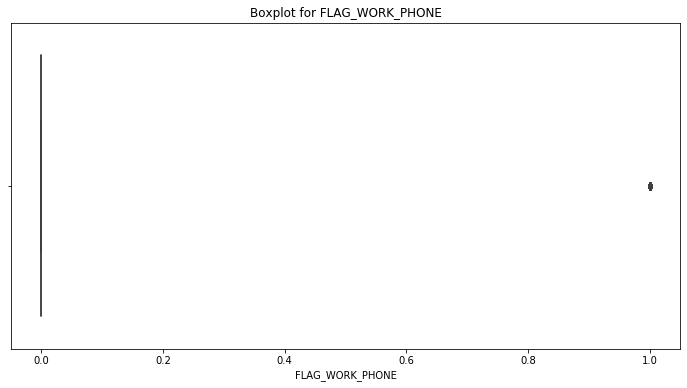

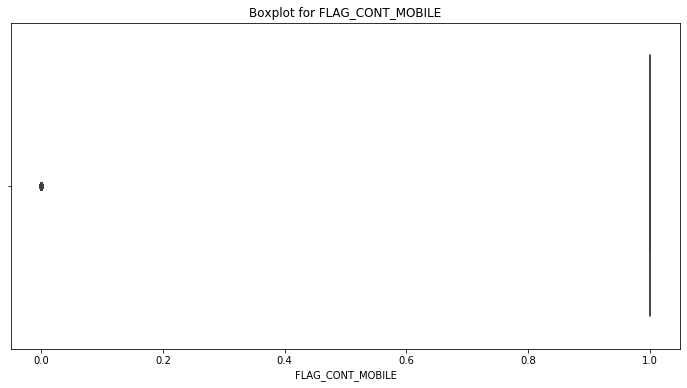

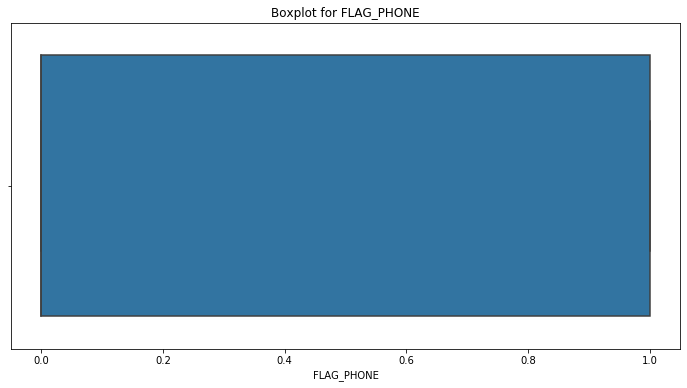

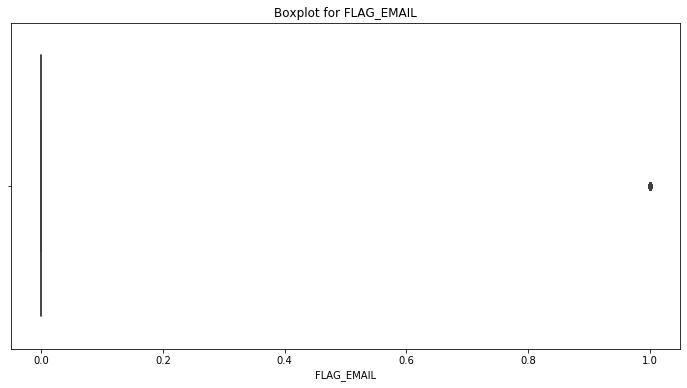

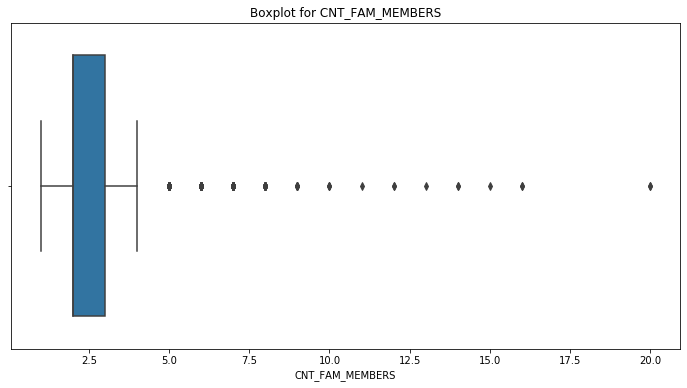

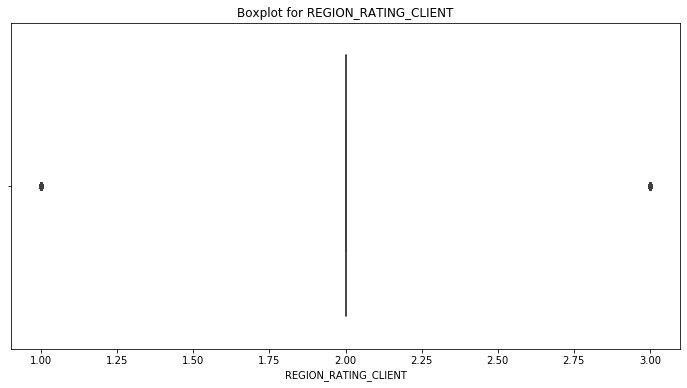

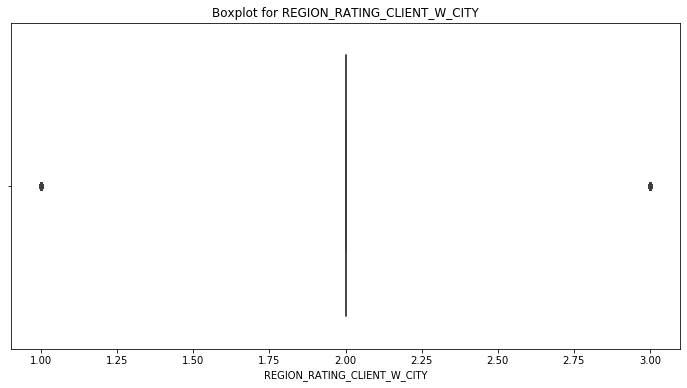

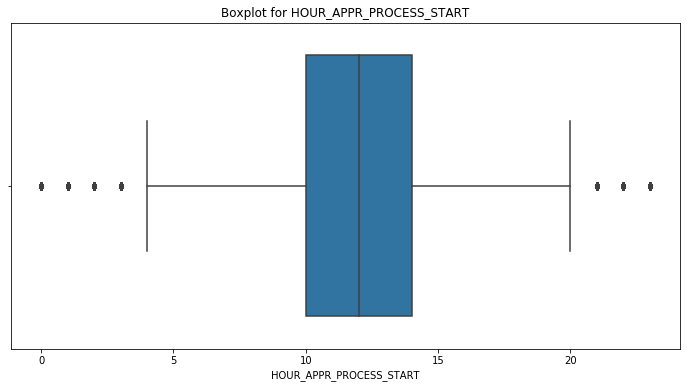

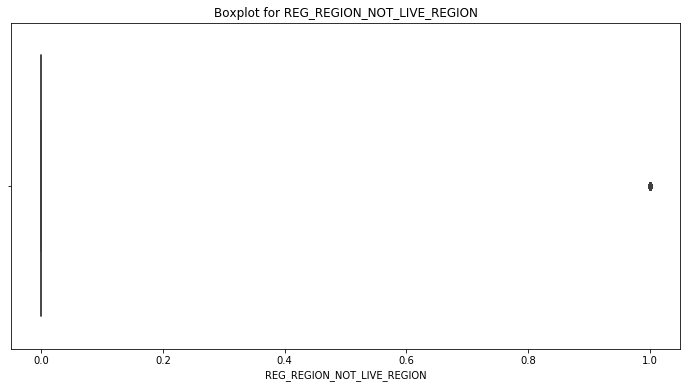

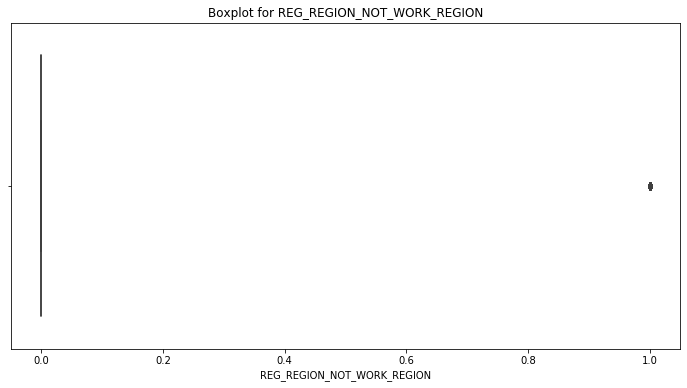

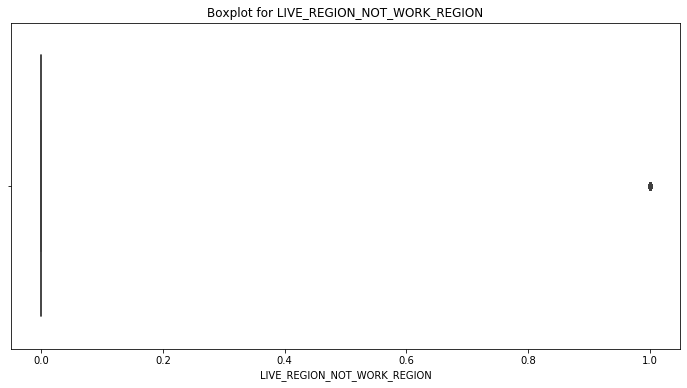

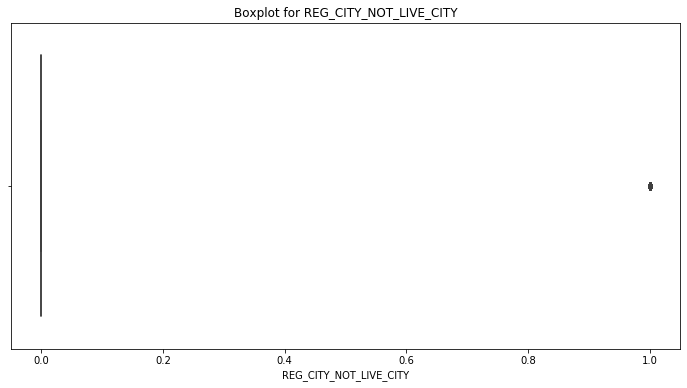

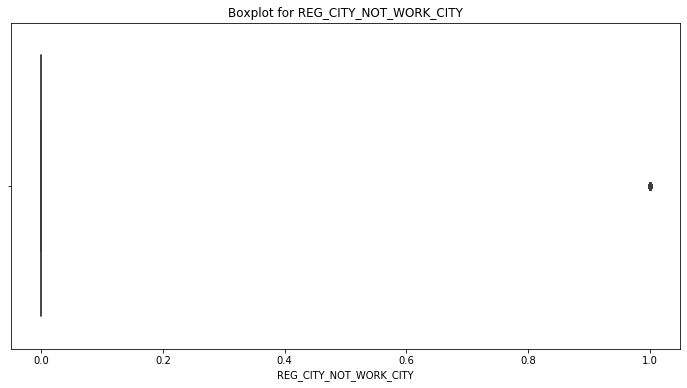

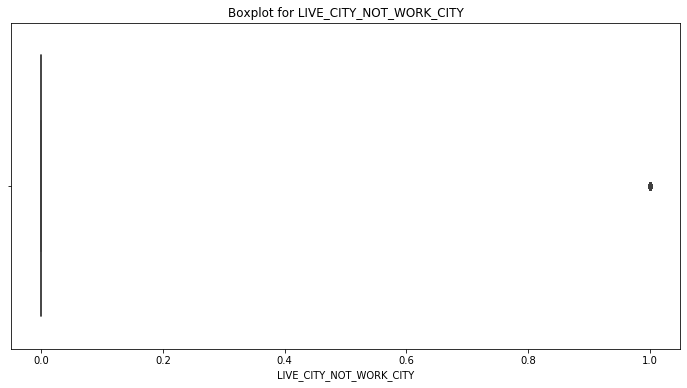

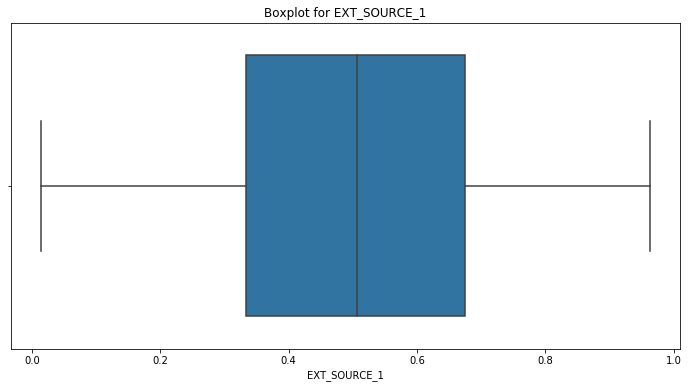

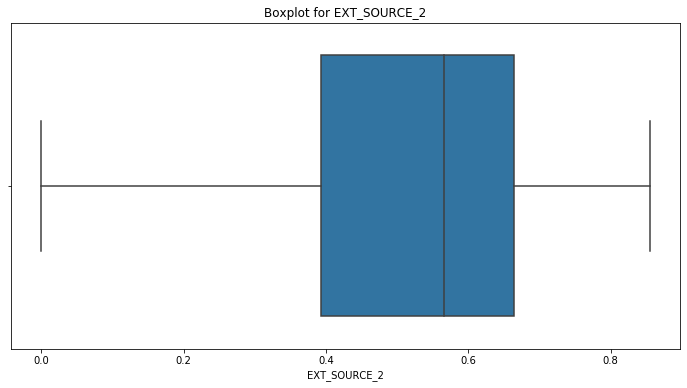

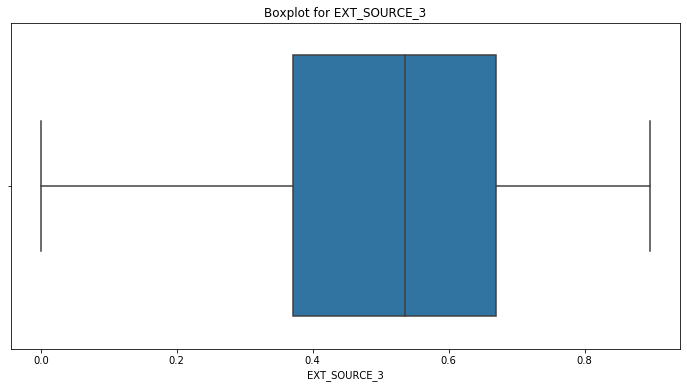

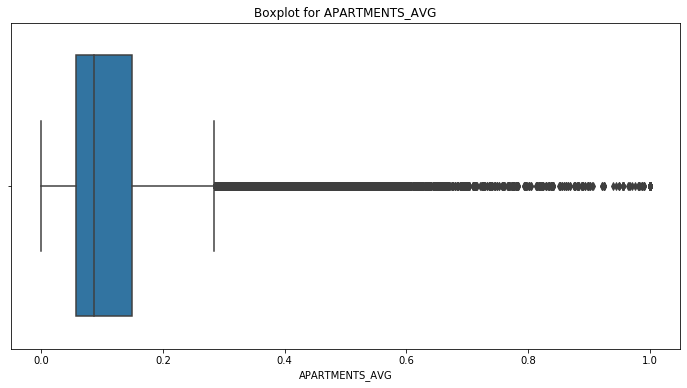

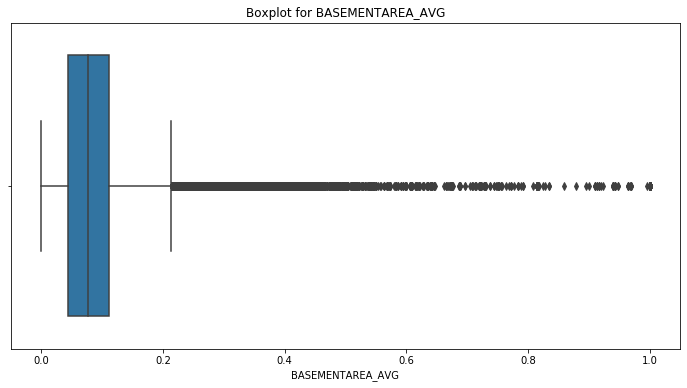

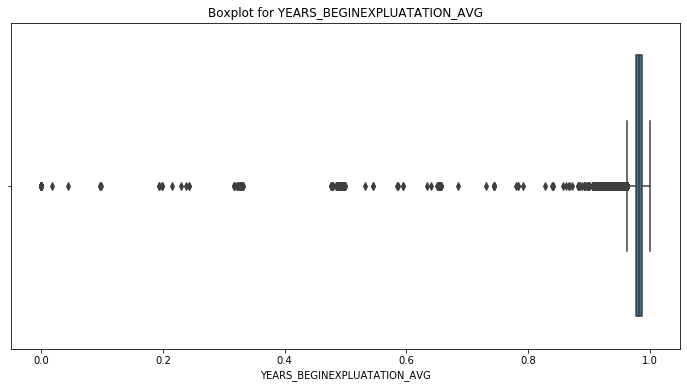

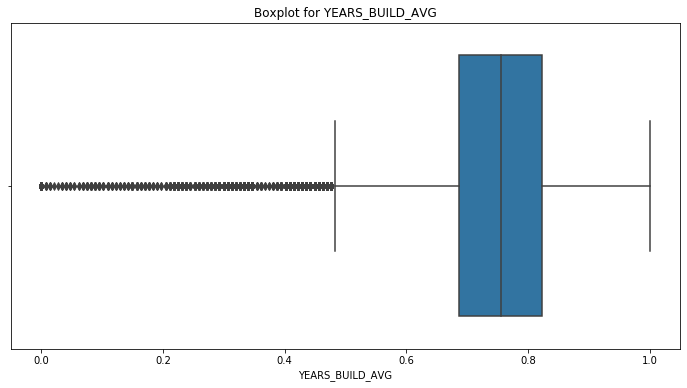

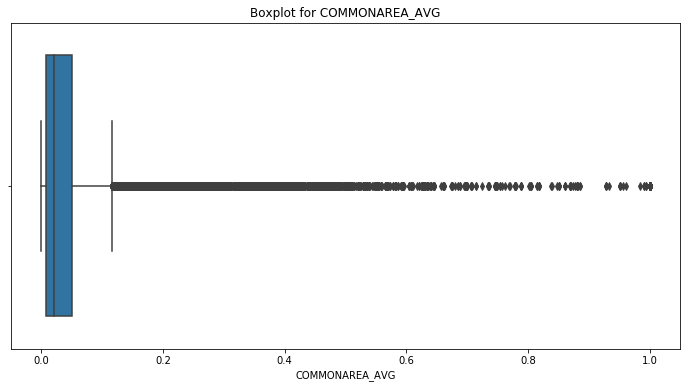

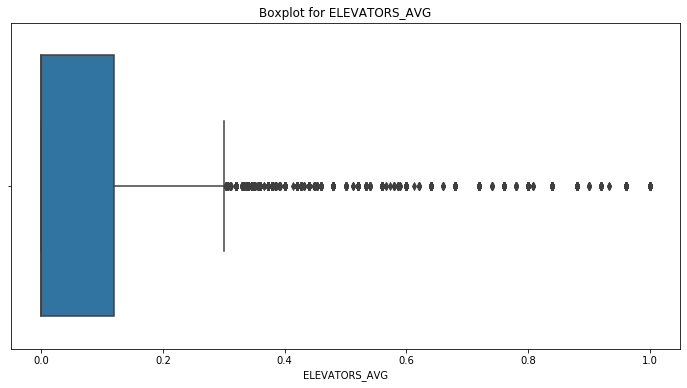

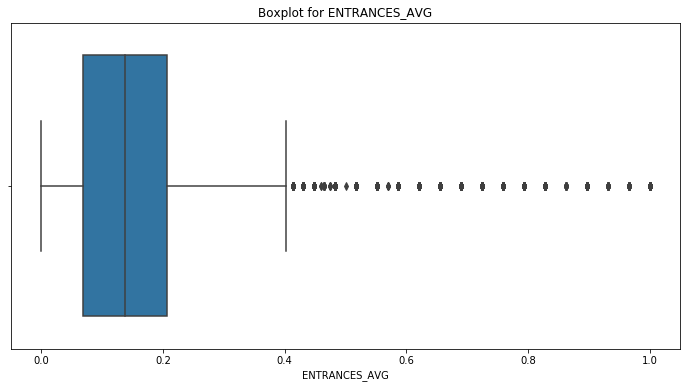

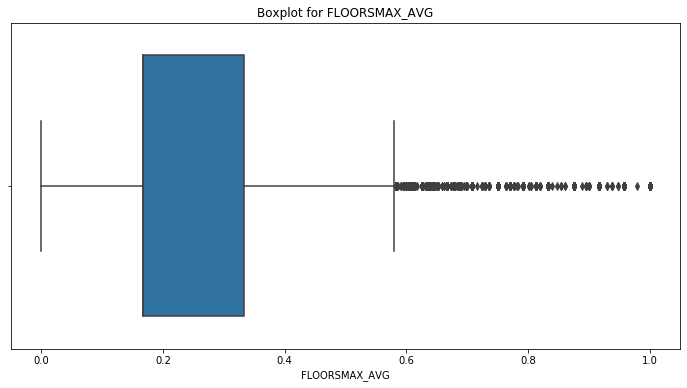

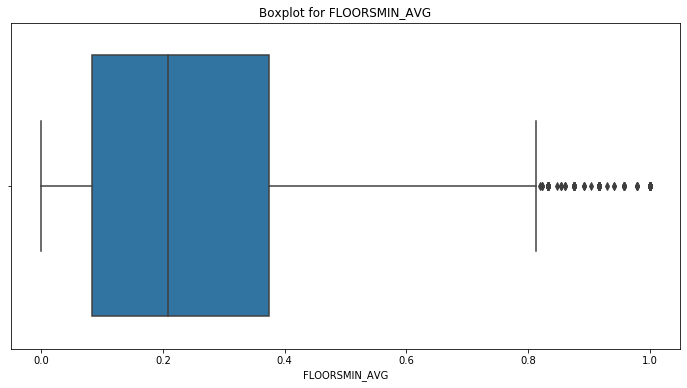

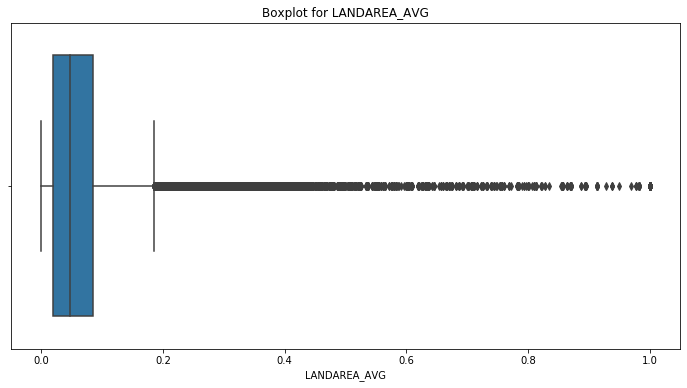

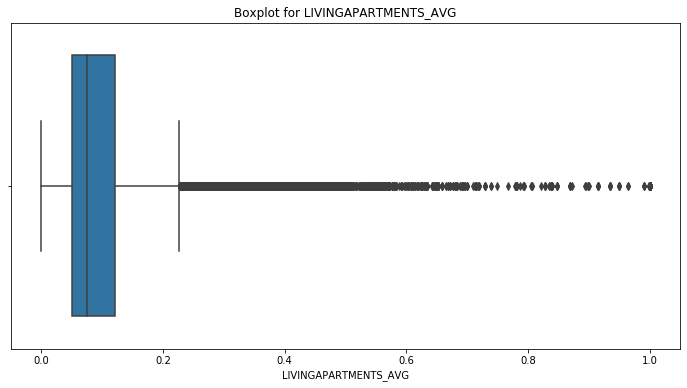

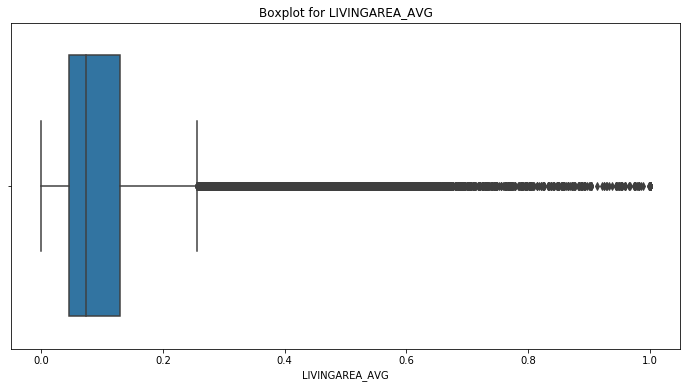

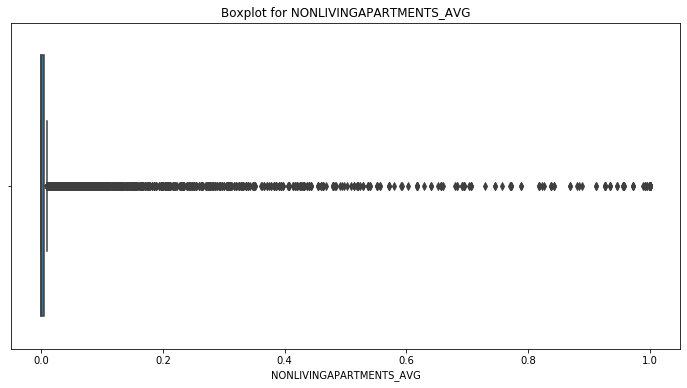

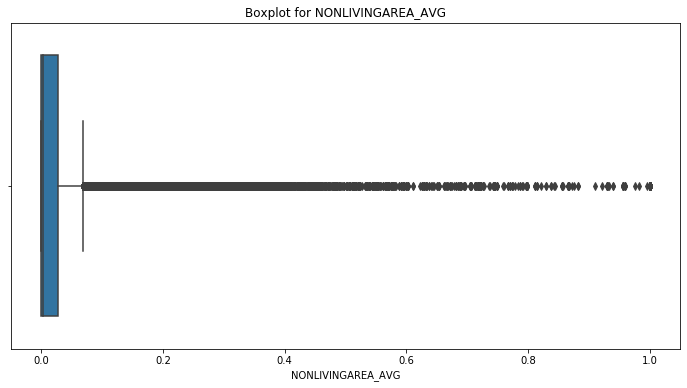

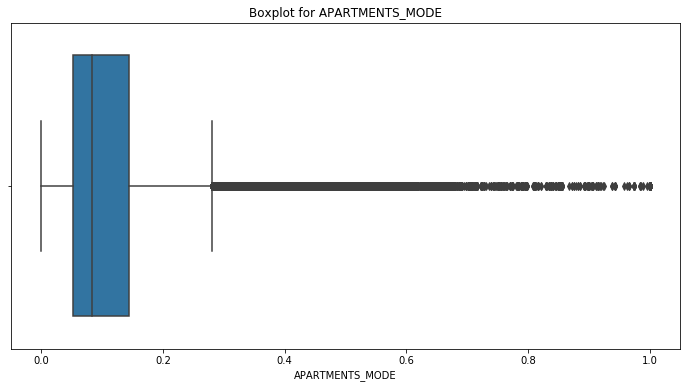

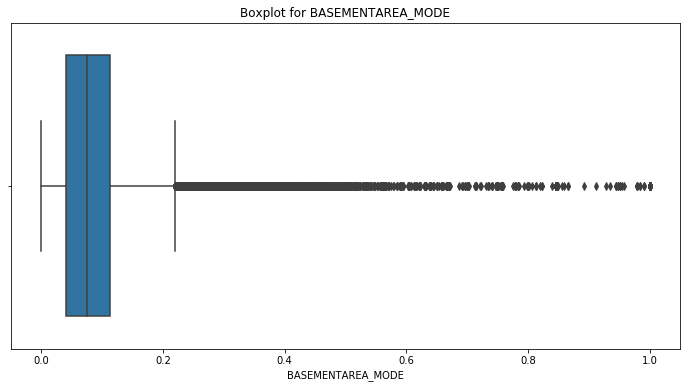

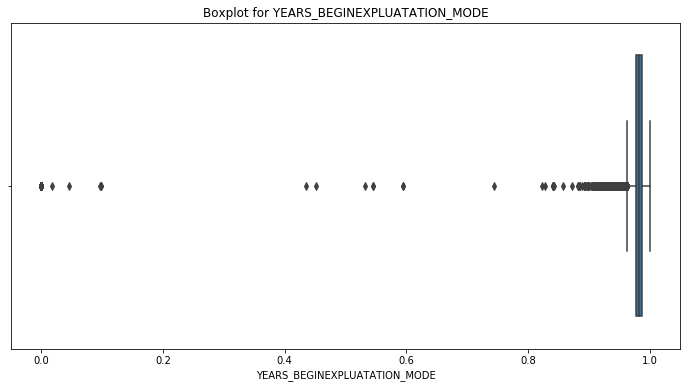

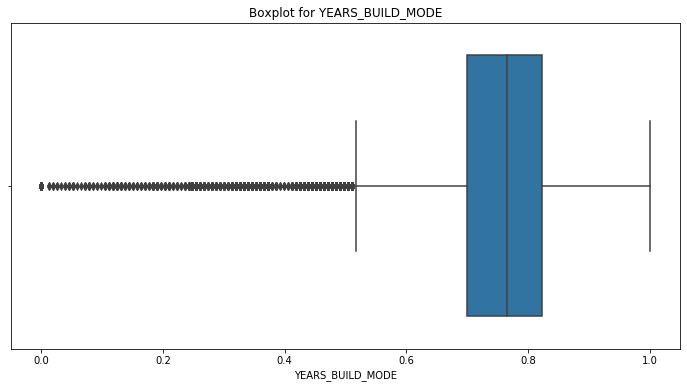

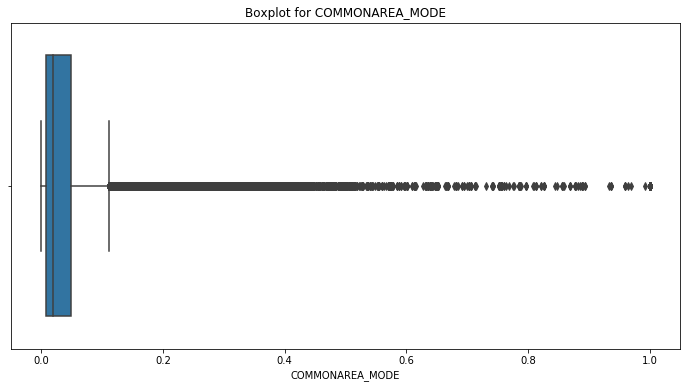

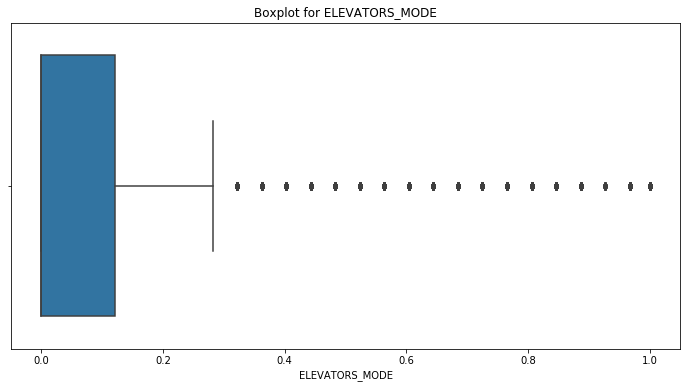

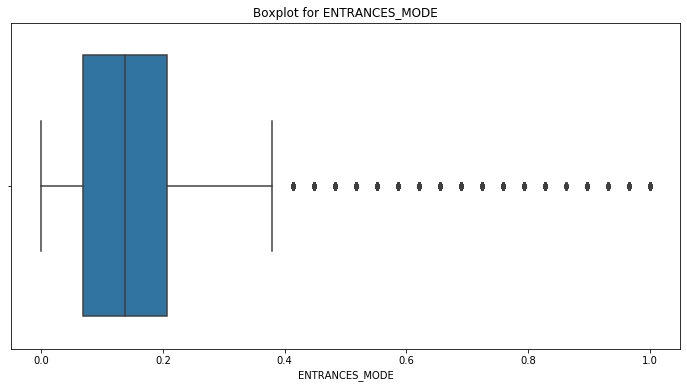

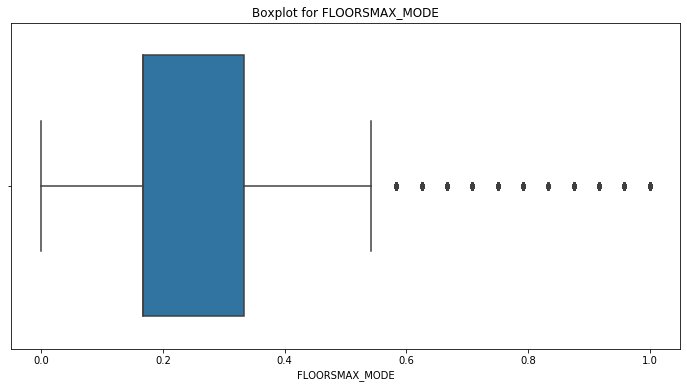

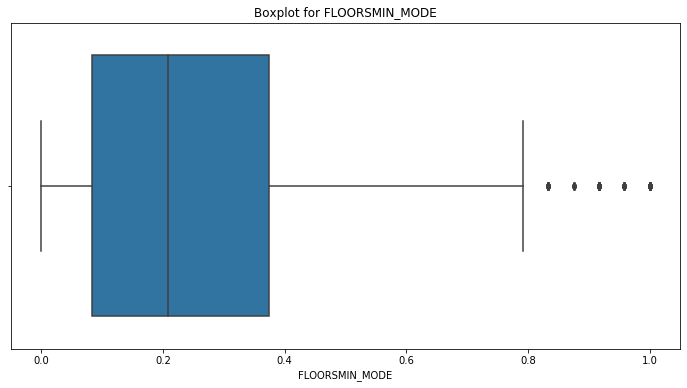

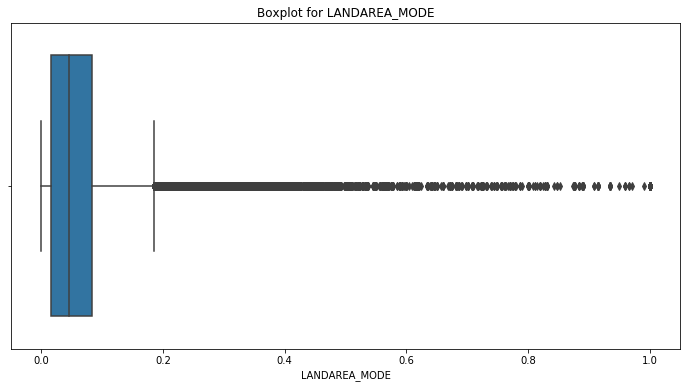

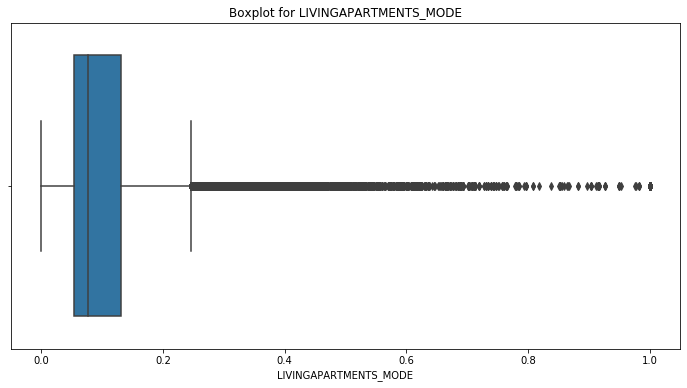

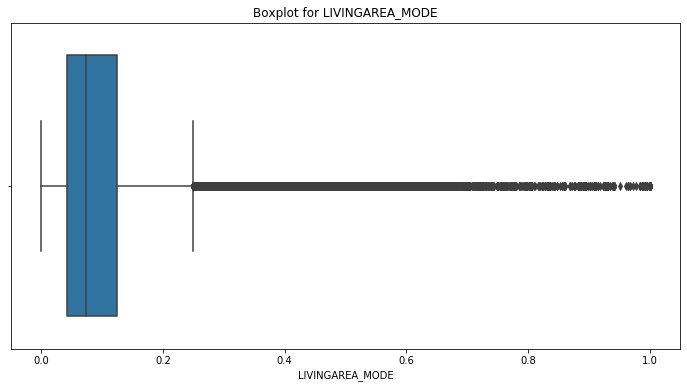

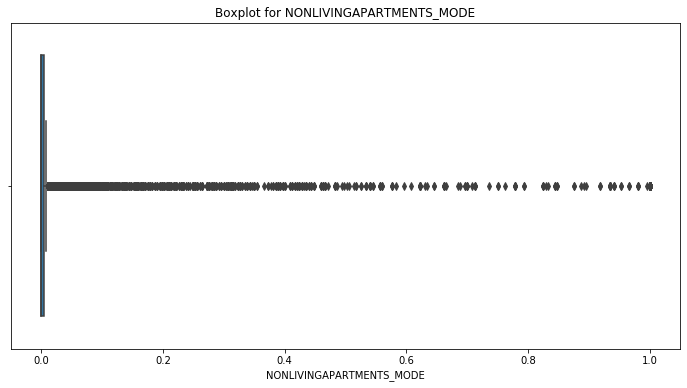

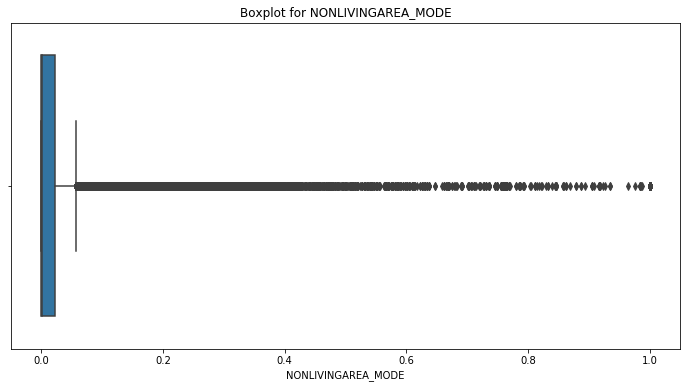

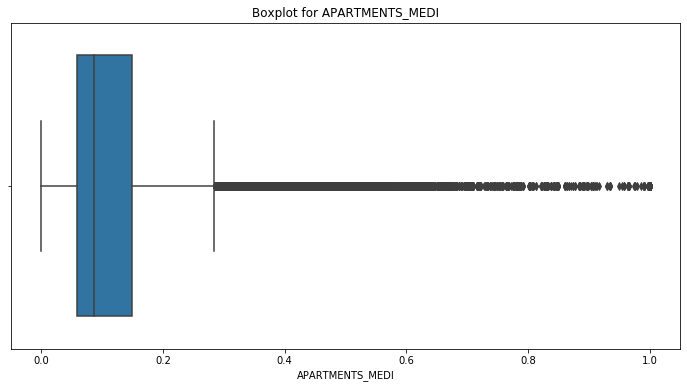

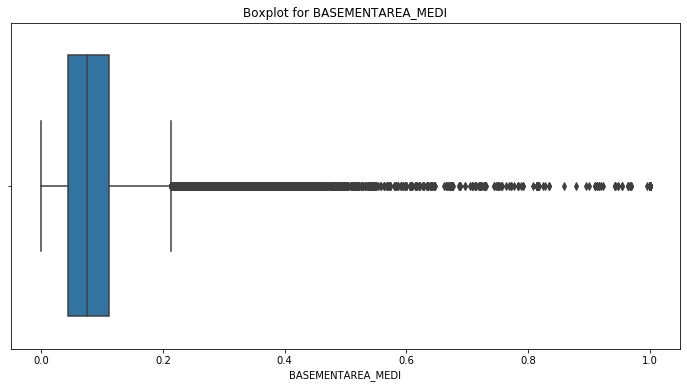

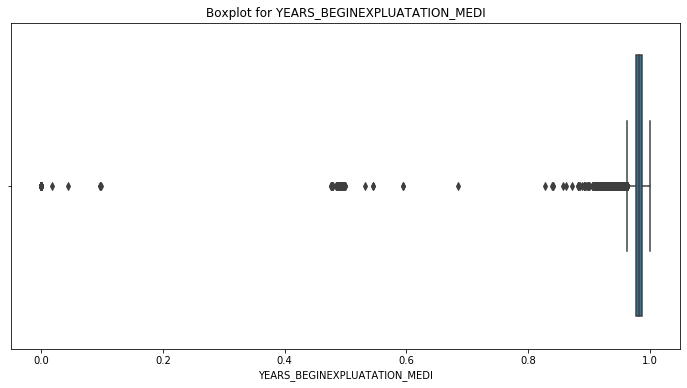

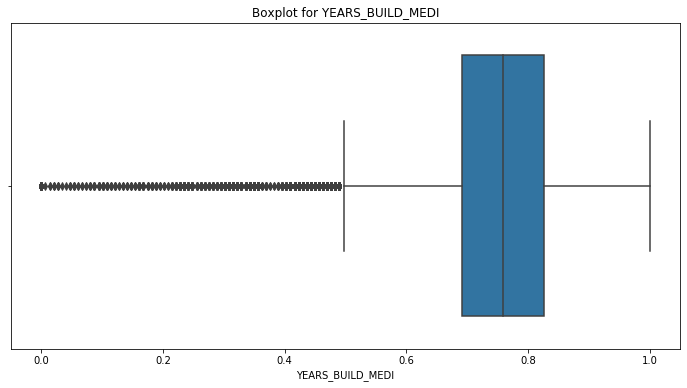

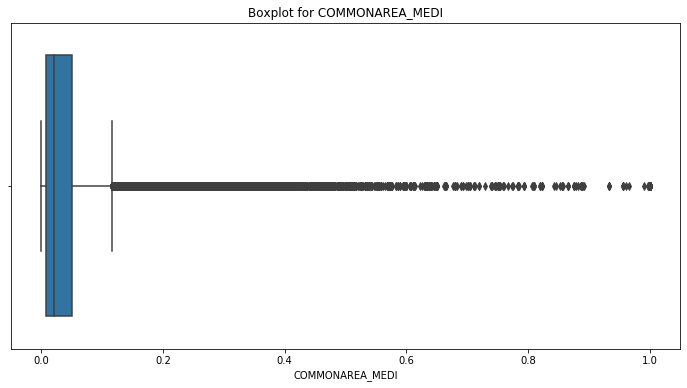

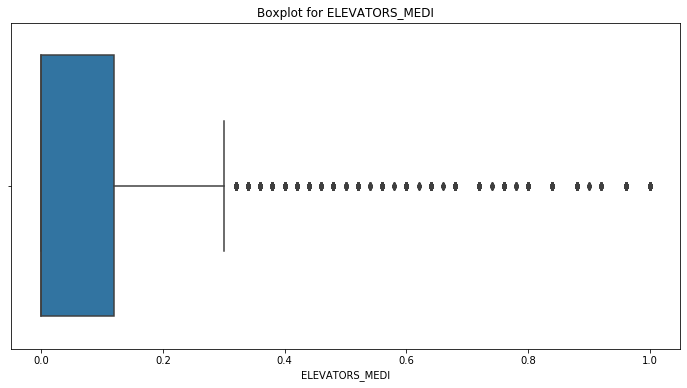

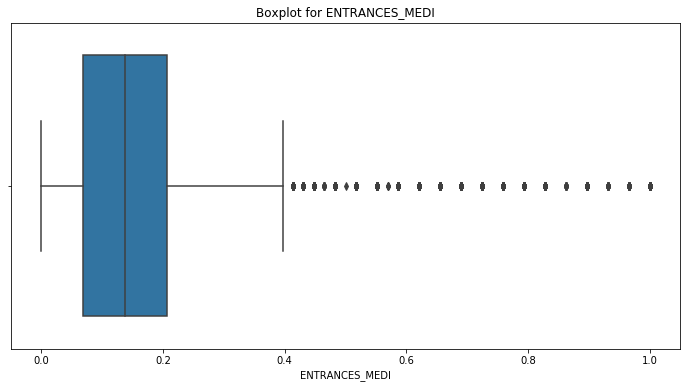

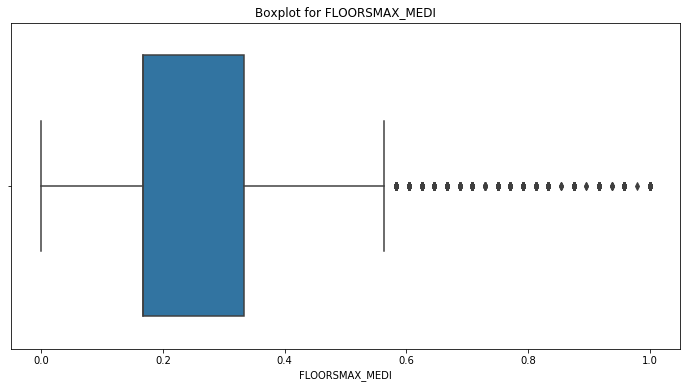

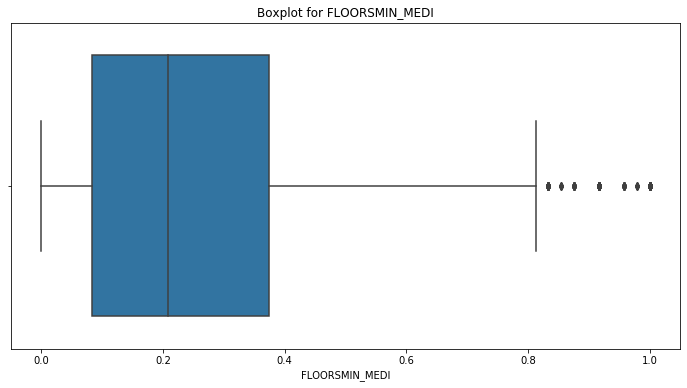

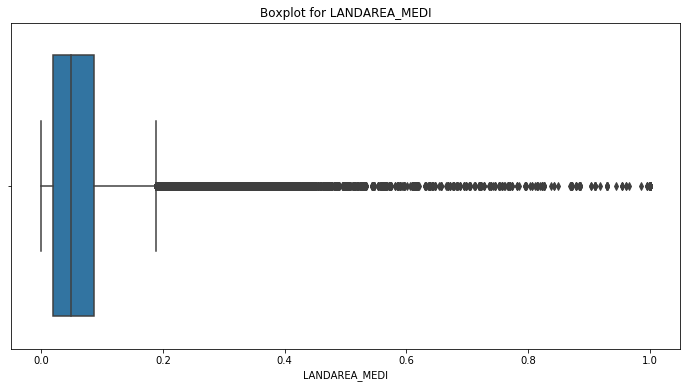

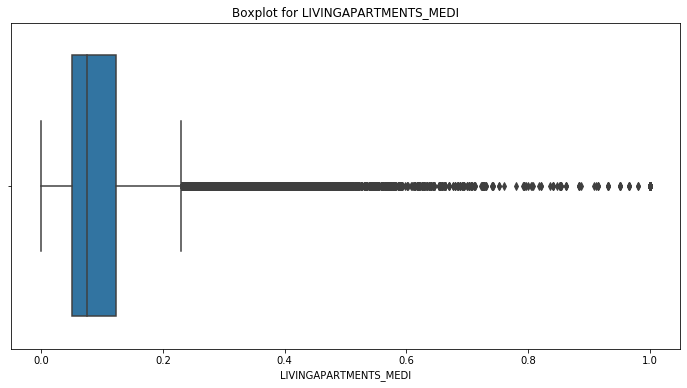

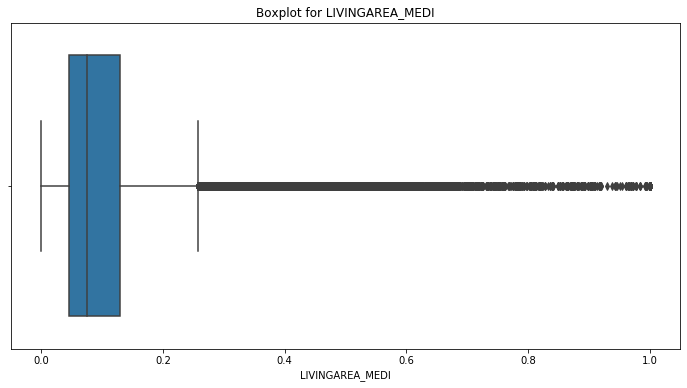

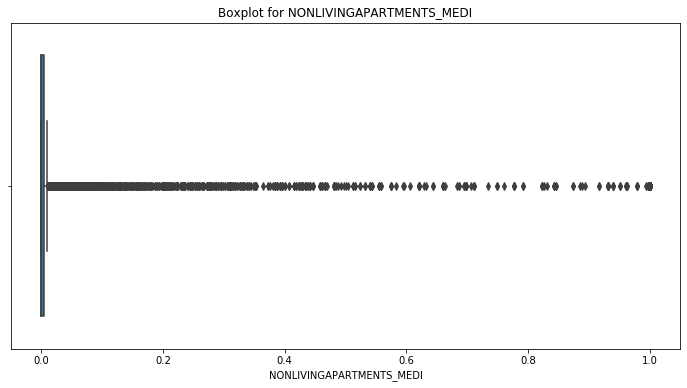

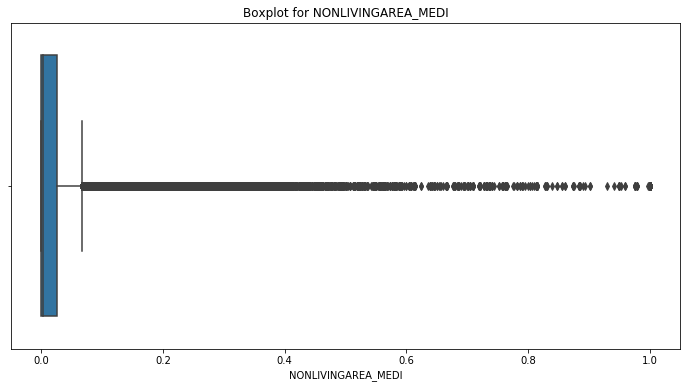

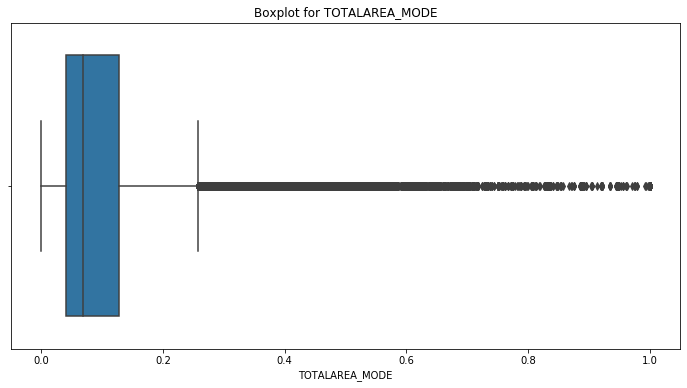

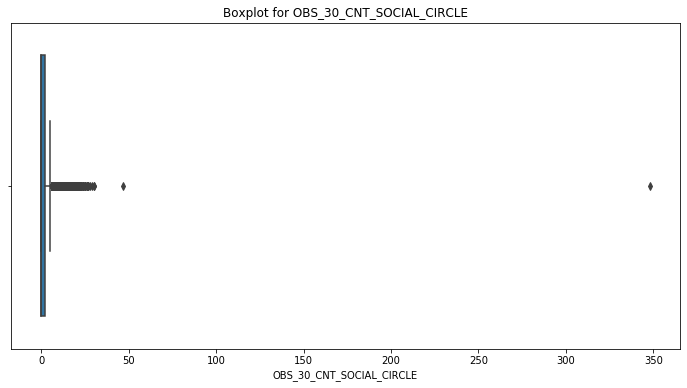

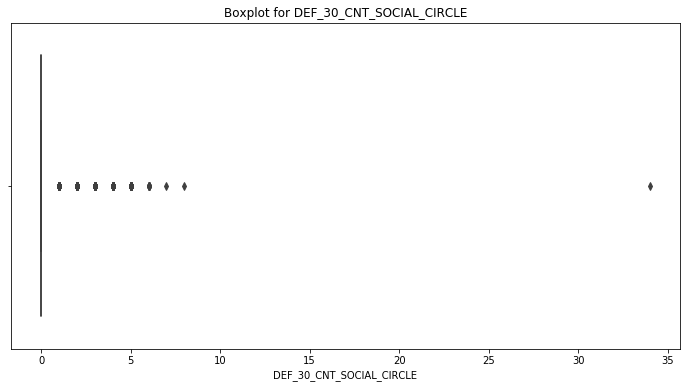

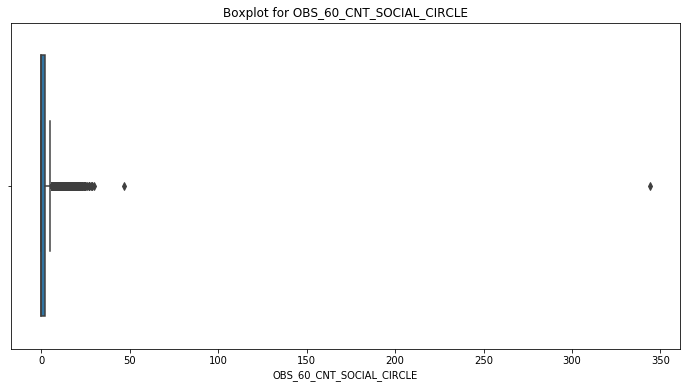

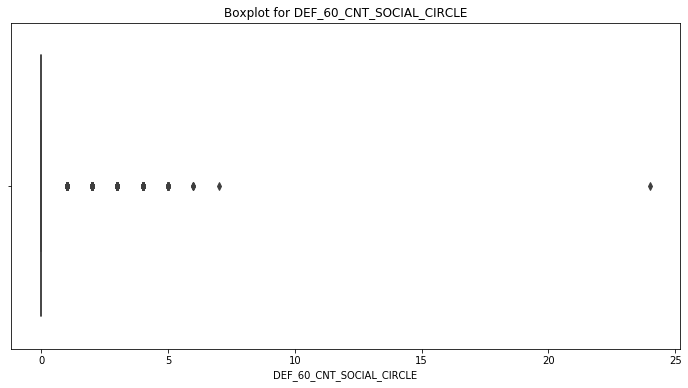

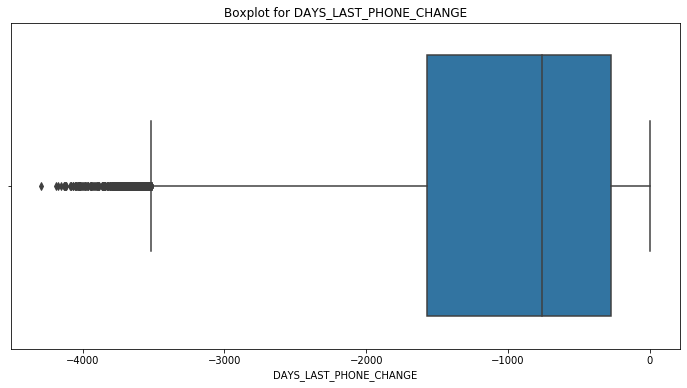

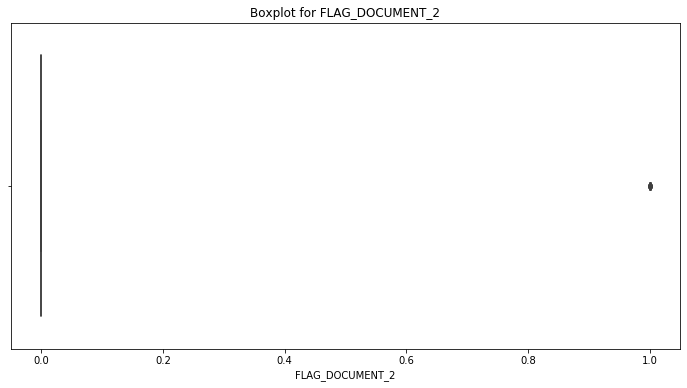

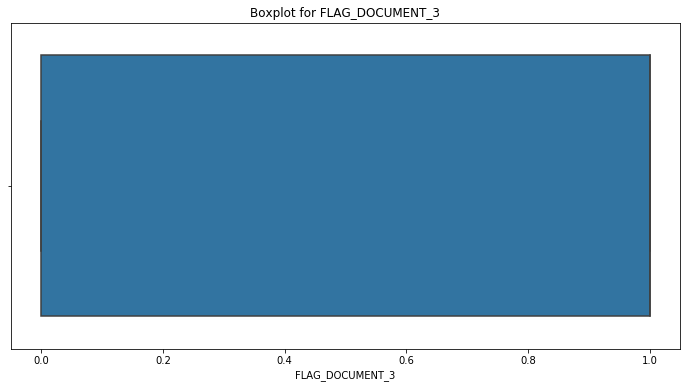

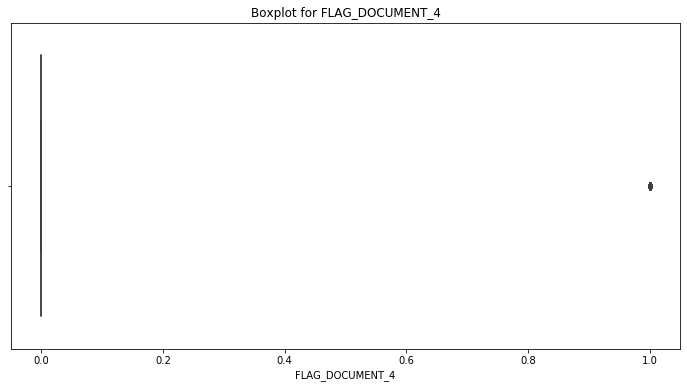

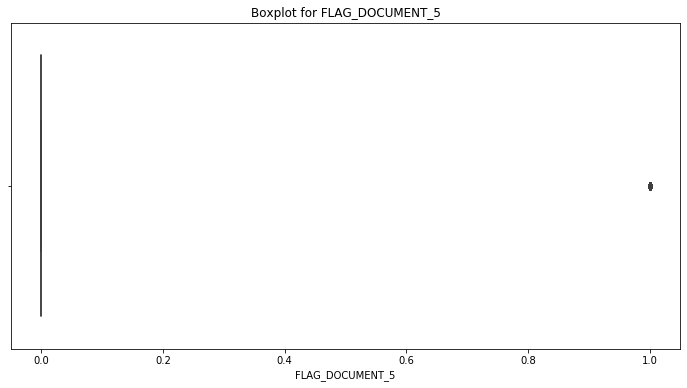

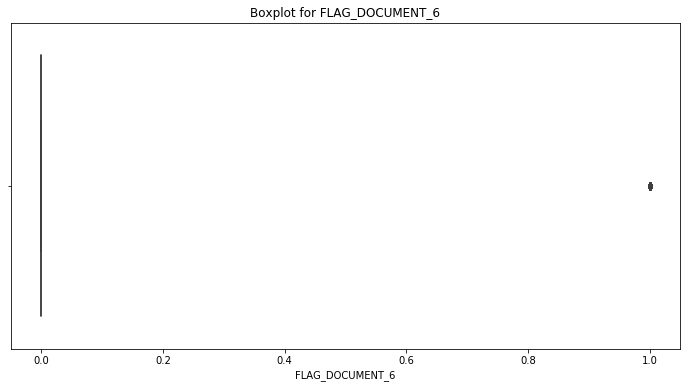

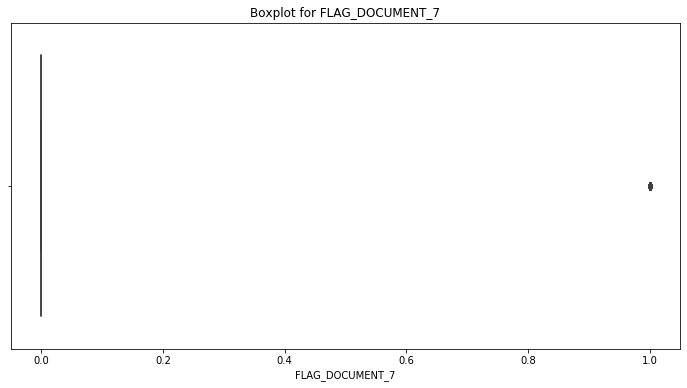

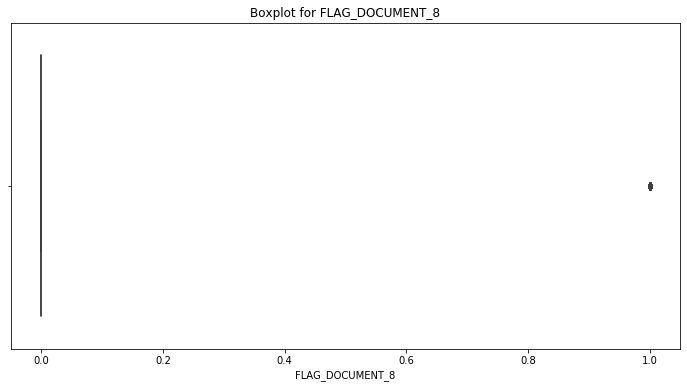

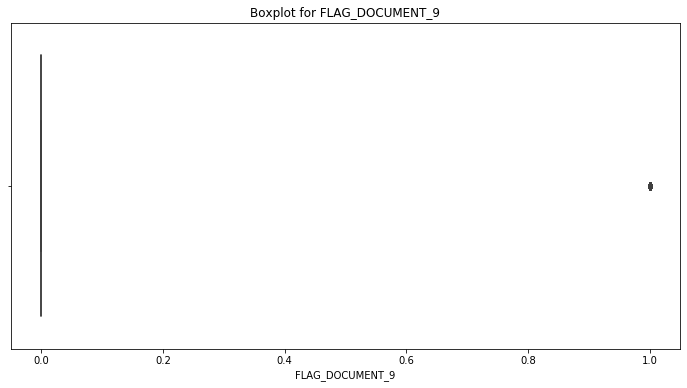

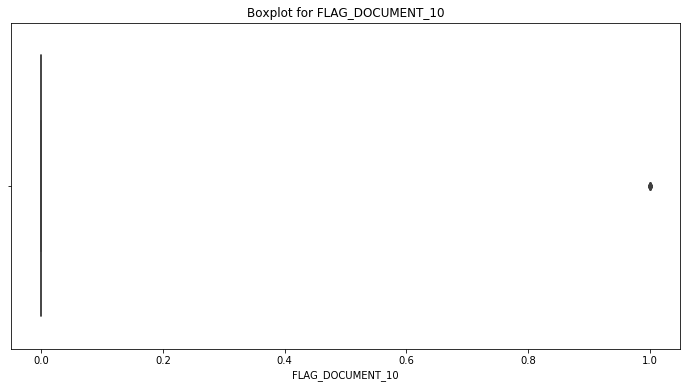

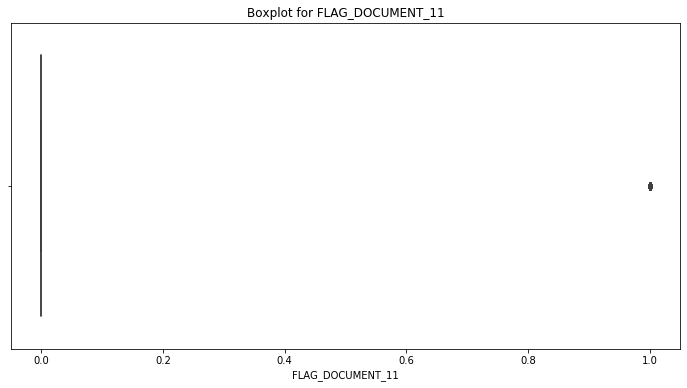

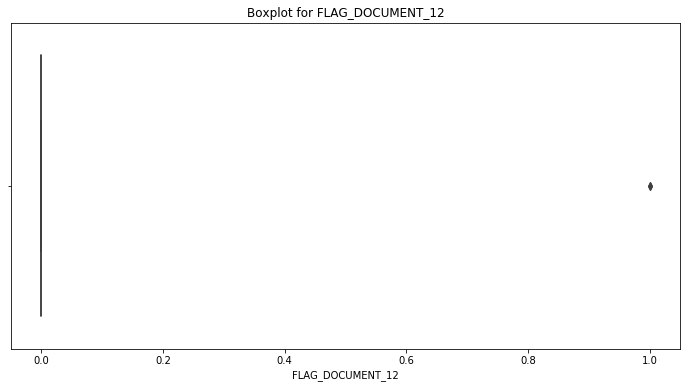

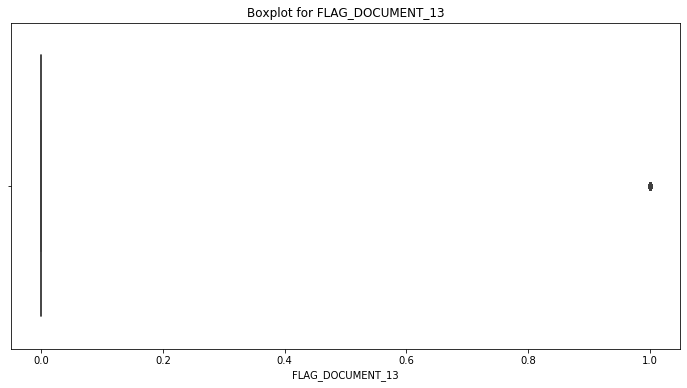

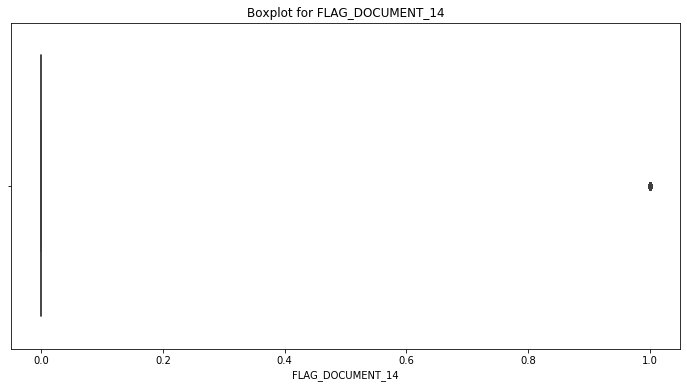

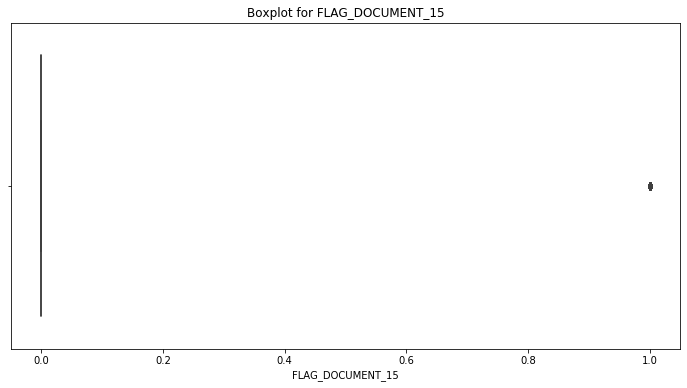

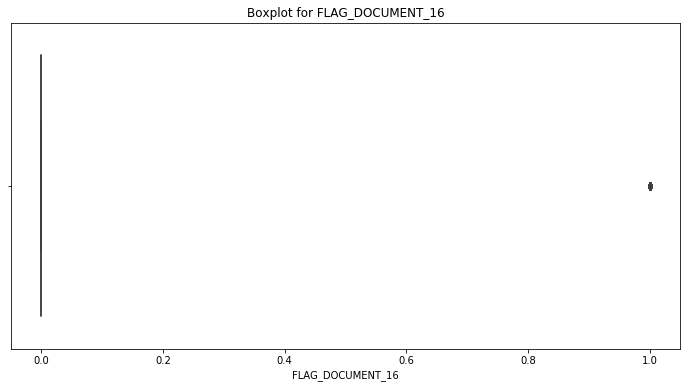

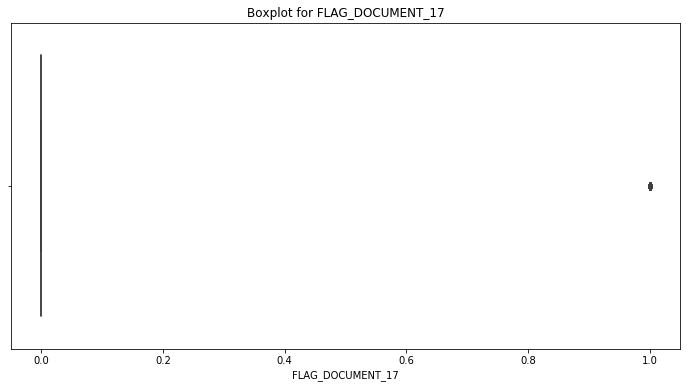

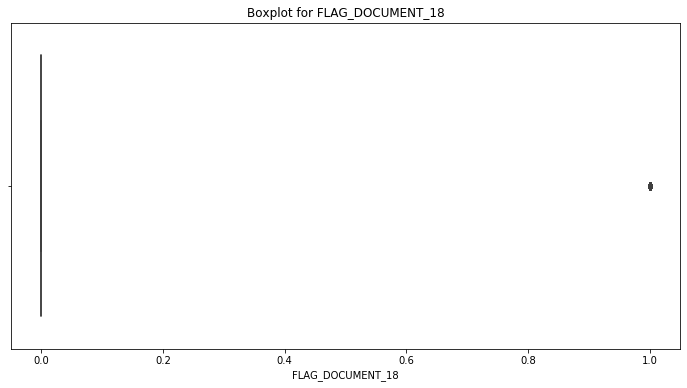

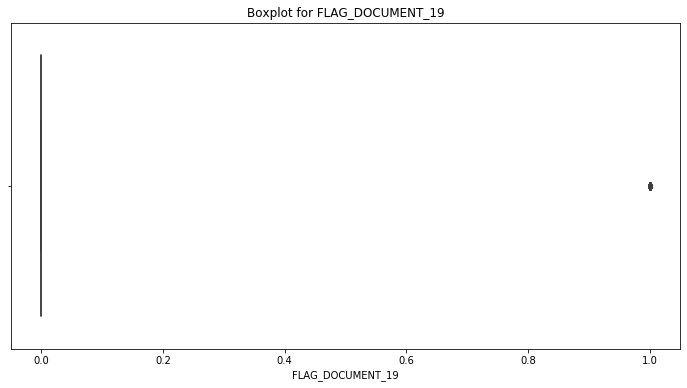

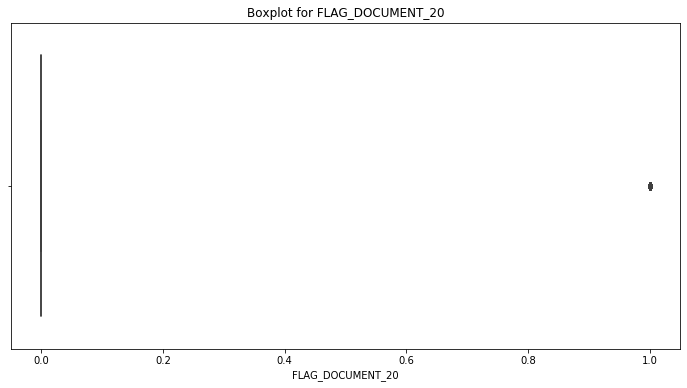

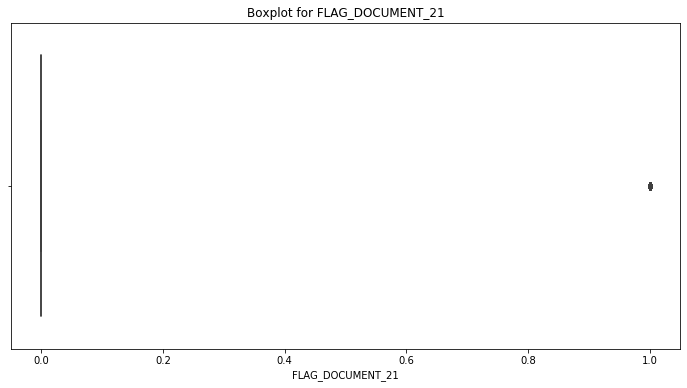

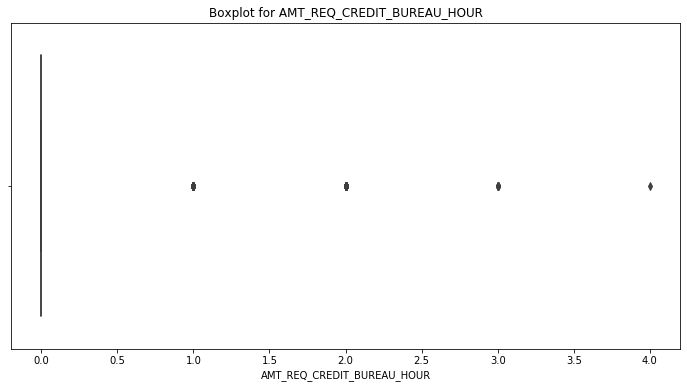

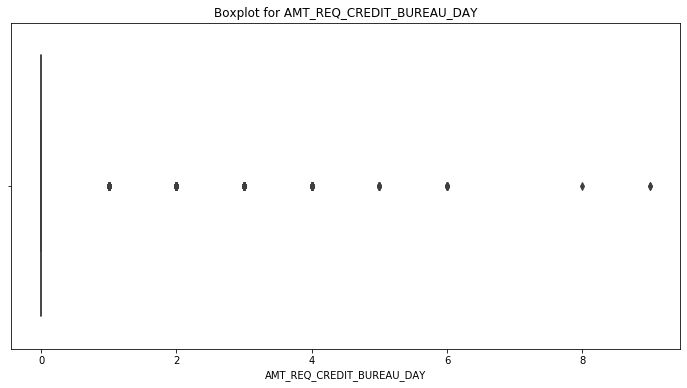

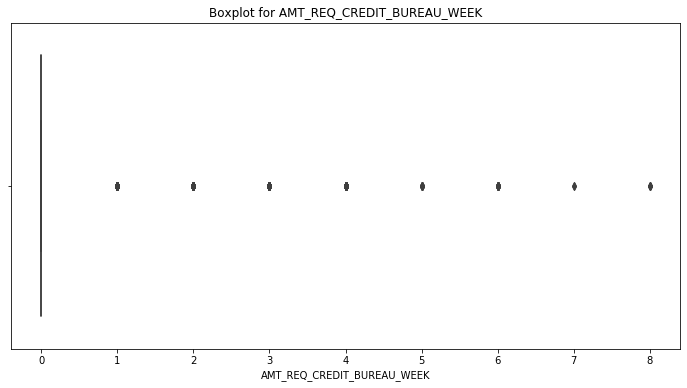

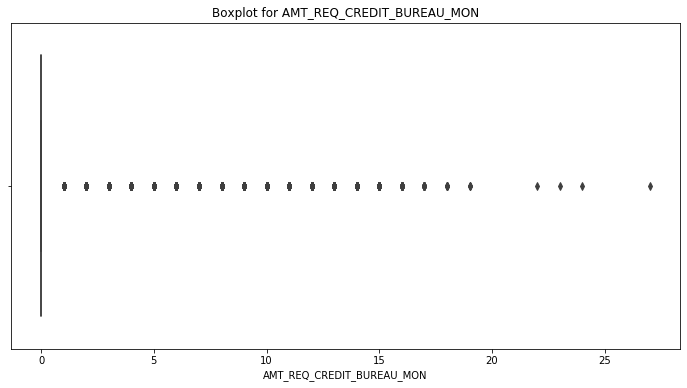

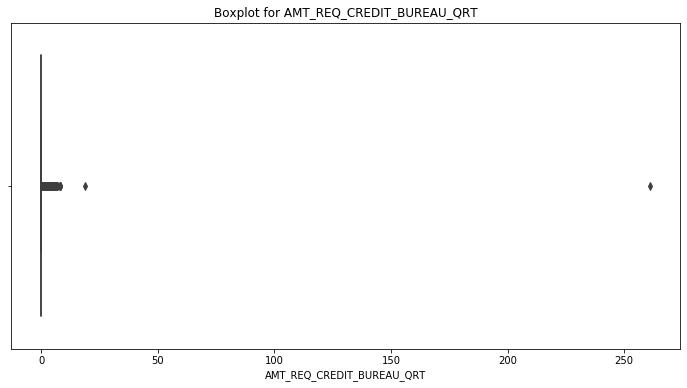

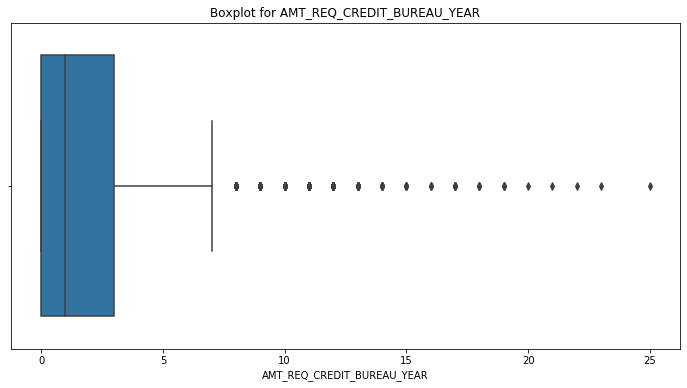

In [20]:
## Using BOXPLOT to identify the columns which are having outliers. 
plt.rcParams.update({'figure.max_open_warning': 0})
for i in numeric_cols:
    #plt.plot(i)
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=applicationsData[i])
    plt.title("Boxplot for {0}".format(i))

### Boxplot analysis:
From this analysis, it is seen that below variables are having outliers which is far away from Box min and max values.
1. REGION_POPULATION_RELATIVE
2. DAYS_EMPLOYED
3. HOUR_APPR_PROCESS_START
4. AMT_REQ_CREDIT_BUREAU_YEAR

#### Taking the relevant columns from the original dataframe :

In [21]:
## Taking the columns those make sense while reading the database only
# AMT_ANNUITY, AMT_CREDIT,AMT_GOODS_PRICE, AMT_INCOME_TOTAL are needed as we need to analyse them as they provide info about
# credit, annuity and goods price as well as income total.

applicationsData_relevant = applicationsData[['TARGET','AMT_ANNUITY',
'AMT_CREDIT',
'AMT_GOODS_PRICE',
'AMT_INCOME_TOTAL',
'AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_MON',
'AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_YEAR',
'CNT_CHILDREN',
'CNT_FAM_MEMBERS',
'CODE_GENDER',
'DAYS_BIRTH',
'DAYS_EMPLOYED','EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'NAME_TYPE_SUITE',
'DAYS_ID_PUBLISH',
'DAYS_LAST_PHONE_CHANGE',
'DAYS_REGISTRATION',
'FLAG_CONT_MOBILE',
'FLAG_EMAIL',
'FLAG_EMP_PHONE',
'FLAG_MOBIL',
'FLAG_OWN_CAR',
'FLAG_OWN_REALTY',
'FLAG_PHONE',
'FLAG_WORK_PHONE',
'NAME_CONTRACT_TYPE',
'NAME_EDUCATION_TYPE',
'NAME_FAMILY_STATUS',
'NAME_HOUSING_TYPE',
'NAME_INCOME_TYPE',
'OBS_30_CNT_SOCIAL_CIRCLE',
'OCCUPATION_TYPE',
'ORGANIZATION_TYPE',
'REG_REGION_NOT_LIVE_REGION',
'REGION_POPULATION_RELATIVE',
'REGION_RATING_CLIENT',
'SK_ID_CURR',
'WEEKDAY_APPR_PROCESS_START'
]]
applicationsData_relevant.head()

,TARGET,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_CHILDREN,CNT_FAM_MEMBERS,CODE_GENDER,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,NAME_TYPE_SUITE,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,FLAG_CONT_MOBILE,FLAG_EMAIL,FLAG_EMP_PHONE,FLAG_MOBIL,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_PHONE,FLAG_WORK_PHONE,NAME_CONTRACT_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,OCCUPATION_TYPE,ORGANIZATION_TYPE,REG_REGION_NOT_LIVE_REGION,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,SK_ID_CURR,WEEKDAY_APPR_PROCESS_START
0,1,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,1.0,0,1.0,M,-9461,-637,0.139376,0.0,Unaccompanied,-2120,-1134.0,-3648.0,1,0,1,1,N,Y,1,0,Cash loans,Secondary / secondary special,Single / not married,House / apartment,Working,2.0,Laborers,Business Entity Type 3,0,0.018801,2,100002,WEDNESDAY
1,0,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0,2.0,F,-16765,-1188,NaN,0.0,Family,-291,-828.0,-1186.0,1,0,1,1,N,N,1,0,Cash loans,Higher education,Married,House / apartment,State servant,1.0,Core staff,School,0,0.003541,1,100003,MONDAY
2,0,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0,1.0,M,-19046,-225,0.729567,0.0,Unaccompanied,-2531,-815.0,-4260.0,1,0,1,1,Y,Y,1,1,Revolving loans,Secondary / secondary special,Single / not married,House / apartment,Working,0.0,Laborers,Government,0,0.010032,2,100004,MONDAY
3,0,29686.5,312682.5,297000.0,135000.0,NaN,NaN,NaN,NaN,NaN,0,2.0,F,-19005,-3039,NaN,NaN,Unaccompanied,-2437,-617.0,-9833.0,1,0,1,1,N,Y,0,0,Cash loans,Secondary / secondary special,Civil marriage,House / apartment,Working,2.0,Laborers,Business Entity Type 3,0,0.008019,2,100006,WEDNESDAY
4,0,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0,1.0,M,-19932,-3038,NaN,0.0,Unaccompanied,-3458,-1106.0,-4311.0,1,0,1,1,N,Y,0,0,Cash loans,Secondary / secondary special,Single / not married,House / apartment,Working,0.0,Core staff,Religion,0,0.028663,2,100007,THURSDAY


In [22]:
missing_value_columns_between10_And_15 = dataframe_after_dropping_NAValues[dataframe_after_dropping_NAValues['percent_missing']>0.4]
missing_value_columns_between10_And_15 =  missing_value_columns_between10_And_15[missing_value_columns_between10_And_15['percent_missing']<40.0]
missing_value_columns_between10_And_15

,column_name,percent_missing
NAME_TYPE_SUITE,NAME_TYPE_SUITE,0.420148
AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_HOUR,13.501631
AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_DAY,13.501631
AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_MON,13.501631
AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_WEEK,13.501631
AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_YEAR,13.501631
AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_QRT,13.501631
EXT_SOURCE_3,EXT_SOURCE_3,19.825307
OCCUPATION_TYPE,OCCUPATION_TYPE,31.345545


In [23]:
dataframe_for_imputaion = applicationsData_relevant[missing_value_columns_between10_And_15['column_name']]

In [24]:
dataframe_for_imputaion

,NAME_TYPE_SUITE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,EXT_SOURCE_3,OCCUPATION_TYPE
0,Unaccompanied,0.0,0.0,0.0,0.0,1.0,0.0,0.139376,Laborers
1,Family,0.0,0.0,0.0,0.0,0.0,0.0,NaN,Core staff
2,Unaccompanied,0.0,0.0,0.0,0.0,0.0,0.0,0.729567,Laborers
3,Unaccompanied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laborers
4,Unaccompanied,0.0,0.0,0.0,0.0,0.0,0.0,NaN,Core staff
5,"Spouse, partner",0.0,0.0,0.0,0.0,1.0,1.0,0.621226,Laborers
6,Unaccompanied,0.0,0.0,1.0,0.0,2.0,1.0,0.492060,Accountants
7,Unaccompanied,0.0,0.0,0.0,0.0,0.0,0.0,0.540654,Managers
8,Children,0.0,0.0,0.0,0.0,1.0,0.0,0.751724,NaN
9,Unaccompanied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laborers


"NAME_TYPE_SUITE", "OCCUPATION_TYPE"  are categorical columns.
Hence value for its imputation will be calculated using "MODE" function.

In [25]:
imputation_value_for_NameTypeSuite = dataframe_for_imputaion['NAME_TYPE_SUITE'].mode()
print(imputation_value_for_NameTypeSuite)

imputation_value_for_OCCUPATION_TYPE = dataframe_for_imputaion['OCCUPATION_TYPE'].mode()
print(imputation_value_for_OCCUPATION_TYPE)

0    Unaccompanied
dtype: object
0    Laborers
dtype: object


From above calculations, "Unaccompanied" can be used to impute Null Values in "NAME_TYPE_SUITE" column and "Laborers" can be used to impute NA values in "OCCUPATION_TYPE" column.

For Continuous variables, value for imputation is to be calculated using "MEAN" or "MEDIAN" functions.
When there is outlier present in data, "MEDIAN" is used to calculate value otherwise "MEAN" value of that column can be used to impute values.

In [26]:
mean_for_EXT_SOURCE_3 = dataframe_for_imputaion['EXT_SOURCE_3'].mean()
print(mean_for_EXT_SOURCE_3)

median_for_EXT_SOURCE_3 = dataframe_for_imputaion['EXT_SOURCE_3'].median()
print(median_for_EXT_SOURCE_3)

0.5108529061736915
0.53527625


For "EXT_SOURCE_3", mean (0.5108) and median (0.5352) are nearly equal. Hence we can use mean (0.5108) to impute null value in column.

In [27]:
mean_for_AMT_REQ_CREDIT_BUREAU_HOUR = dataframe_for_imputaion['AMT_REQ_CREDIT_BUREAU_HOUR'].mean()
print(mean_for_AMT_REQ_CREDIT_BUREAU_HOUR)

median_for_AMT_REQ_CREDIT_BUREAU_HOUR = dataframe_for_imputaion['AMT_REQ_CREDIT_BUREAU_HOUR'].median()
print(median_for_AMT_REQ_CREDIT_BUREAU_HOUR)

0.006402448193930645
0.0


For "AMT_REQ_CREDIT_BUREAU_HOUR", mean (0.00640) and median (0.0) are nearly equal. Hence we can use mean (0.00640) to impute null value in "AMT_REQ_CREDIT_BUREAU_HOUR"column.

In [28]:
mean_for_AMT_REQ_CREDIT_BUREAU_MON = dataframe_for_imputaion['AMT_REQ_CREDIT_BUREAU_MON'].mean()
print(mean_for_AMT_REQ_CREDIT_BUREAU_MON)

median_for_AMT_REQ_CREDIT_BUREAU_MON = dataframe_for_imputaion['AMT_REQ_CREDIT_BUREAU_MON'].median()
print(median_for_AMT_REQ_CREDIT_BUREAU_MON)

0.26739526000781977
0.0


Mean (0.2674) can be used to impute values in "AMT_REQ_CREDIT_BUREAU_MON" column

In [29]:
mean_for_AMT_REQ_CREDIT_BUREAU_QRT = dataframe_for_imputaion['AMT_REQ_CREDIT_BUREAU_QRT'].mean()
print(mean_for_AMT_REQ_CREDIT_BUREAU_QRT)

median_for_AMT_REQ_CREDIT_BUREAU_QRT = dataframe_for_imputaion['AMT_REQ_CREDIT_BUREAU_QRT'].median()
print(median_for_AMT_REQ_CREDIT_BUREAU_QRT)

0.26547414959848414
0.0


Mean (0.2655) can be used to impute values in "AMT_REQ_CREDIT_BUREAU_QRT" column

#### Binning

In [30]:
df_for_binning = applicationsData_relevant.copy()
df_for_binning

,TARGET,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_CHILDREN,CNT_FAM_MEMBERS,CODE_GENDER,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,NAME_TYPE_SUITE,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,FLAG_CONT_MOBILE,FLAG_EMAIL,FLAG_EMP_PHONE,FLAG_MOBIL,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_PHONE,FLAG_WORK_PHONE,NAME_CONTRACT_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,OCCUPATION_TYPE,ORGANIZATION_TYPE,REG_REGION_NOT_LIVE_REGION,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,SK_ID_CURR,WEEKDAY_APPR_PROCESS_START
0,1,24700.5,406597.5,351000.0,202500.000,0.0,0.0,0.0,0.0,1.0,0,1.0,M,-9461,-637,0.139376,0.0,Unaccompanied,-2120,-1134.0,-3648.0,1,0,1,1,N,Y,1,0,Cash loans,Secondary / secondary special,Single / not married,House / apartment,Working,2.0,Laborers,Business Entity Type 3,0,0.018801,2,100002,WEDNESDAY
1,0,35698.5,1293502.5,1129500.0,270000.000,0.0,0.0,0.0,0.0,0.0,0,2.0,F,-16765,-1188,NaN,0.0,Family,-291,-828.0,-1186.0,1,0,1,1,N,N,1,0,Cash loans,Higher education,Married,House / apartment,State servant,1.0,Core staff,School,0,0.003541,1,100003,MONDAY
2,0,6750.0,135000.0,135000.0,67500.000,0.0,0.0,0.0,0.0,0.0,0,1.0,M,-19046,-225,0.729567,0.0,Unaccompanied,-2531,-815.0,-4260.0,1,0,1,1,Y,Y,1,1,Revolving loans,Secondary / secondary special,Single / not married,House / apartment,Working,0.0,Laborers,Government,0,0.010032,2,100004,MONDAY
3,0,29686.5,312682.5,297000.0,135000.000,NaN,NaN,NaN,NaN,NaN,0,2.0,F,-19005,-3039,NaN,NaN,Unaccompanied,-2437,-617.0,-9833.0,1,0,1,1,N,Y,0,0,Cash loans,Secondary / secondary special,Civil marriage,House / apartment,Working,2.0,Laborers,Business Entity Type 3,0,0.008019,2,100006,WEDNESDAY
4,0,21865.5,513000.0,513000.0,121500.000,0.0,0.0,0.0,0.0,0.0,0,1.0,M,-19932,-3038,NaN,0.0,Unaccompanied,-3458,-1106.0,-4311.0,1,0,1,1,N,Y,0,0,Cash loans,Secondary / secondary special,Single / not married,House / apartment,Working,0.0,Core staff,Religion,0,0.028663,2,100007,THURSDAY
5,0,27517.5,490495.5,454500.0,99000.000,0.0,0.0,1.0,0.0,1.0,0,2.0,M,-16941,-1588,0.621226,0.0,"Spouse, partner",-477,-2536.0,-4970.0,1,0,1,1,N,Y,1,1,Cash loans,Secondary / secondary special,Married,House / apartment,State servant,0.0,Laborers,Other,0,0.035792,2,100008,WEDNESDAY
6,0,41301.0,1560726.0,1395000.0,171000.000,0.0,1.0,1.0,0.0,2.0,1,3.0,F,-13778,-3130,0.492060,0.0,Unaccompanied,-619,-1562.0,-1213.0,1,0,1,1,Y,Y,1,0,Cash loans,Higher education,Married,House / apartment,Commercial associate,1.0,Accountants,Business Entity Type 3,0,0.035792,2,100009,SUNDAY
7,0,42075.0,1530000.0,1530000.0,360000.000,0.0,0.0,0.0,0.0,0.0,0,2.0,M,-18850,-449,0.540654,0.0,Unaccompanied,-2379,-1070.0,-4597.0,1,0,1,1,Y,Y,0,1,Cash loans,Higher education,Married,House / apartment,State servant,2.0,Managers,Other,0,0.003122,3,100010,MONDAY
8,0,33826.5,1019610.0,913500.0,112500.000,0.0,0.0,0.0,0.0,1.0,0,2.0,F,-20099,365243,0.751724,0.0,Children,-3514,0.0,-7427.0,1,0,0,1,N,Y,0,0,Cash loans,Secondary / secondary special,Married,House / apartment,Pensioner,1.0,NaN,XNA,0,0.018634,2,100011,WEDNESDAY
9,0,20250.0,405000.0,405000.0,135000.000,NaN,NaN,NaN,NaN,NaN,0,1.0,M,-14469,-2019,NaN,NaN,Unaccompanied,-3992,-1673.0,-14437.0,1,0,1,1,N,Y,0,0,Revolving loans,Secondary / secondary special,Single / not married,House / apartment,Working,2.0,Laborers,Electricity,0,0.019689,2,100012,THURSDAY


In [31]:
#Labelling the individual bins
amount_bin_labels = ['Low','Medium','High']

#Setting the bin limits
amount_bins = [0, 100000, 500000, 10000000]

df_for_binning['AMT_CREDIT_LEVELS'] = pd.cut(df_for_binning['AMT_CREDIT'], bins=amount_bins, labels=amount_bin_labels)
df_for_binning[['AMT_CREDIT','AMT_CREDIT_LEVELS']]

,AMT_CREDIT,AMT_CREDIT_LEVELS
0,406597.5,Medium
1,1293502.5,High
2,135000.0,Medium
3,312682.5,Medium
4,513000.0,High
5,490495.5,Medium
6,1560726.0,High
7,1530000.0,High
8,1019610.0,High
9,405000.0,Medium


In [32]:
#Labelling the individual bins
amount_bin_labels = ['Poor','Average','Good']

#Setting the bin limits
amount_bins = [0, 100000, 500000, 10000000]
df_for_binning['AMT_INCOME_TOTAL_LEVELS'] = pd.cut(df_for_binning['AMT_INCOME_TOTAL'], bins=amount_bins, labels=amount_bin_labels)
df_for_binning[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_LEVELS']]

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_LEVELS
0,202500.000,Average
1,270000.000,Average
2,67500.000,Poor
3,135000.000,Average
4,121500.000,Average
5,99000.000,Poor
6,171000.000,Average
7,360000.000,Average
8,112500.000,Average
9,135000.000,Average


### Imbalance Data

In [33]:
#Finding counts of 1 and 0 in"target" column
applicationsData_relevant.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [34]:
columns_with_zero = applicationsData_relevant[applicationsData_relevant.TARGET == 0].shape[0]
columns_with_zero

282686

In [35]:
columns_with_one = applicationsData_relevant[applicationsData_relevant.TARGET == 1].shape[0]
columns_with_one

24825

In [36]:
#% Imabalance for 0 
Imabalance_for_0 = columns_with_zero/ (columns_with_zero+columns_with_one)
Imabalance_for_0 = Imabalance_for_0 *100
print( "% Imabalance for 0 is ",round(Imabalance_for_0,2))

% Imabalance for 0 is  91.93


In [37]:
#% Imabalance for 1
Imabalance_for_1 = columns_with_one/ (columns_with_zero+columns_with_one)
Imabalance_for_1 = Imabalance_for_1 *100
print( "% Imabalance for 1 is ",round(Imabalance_for_1,2))

% Imabalance for 1 is  8.07


In [38]:
dataset_for_target_zero = applicationsData_relevant[applicationsData_relevant.TARGET == 0]
dataset_for_target_zero

,TARGET,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_CHILDREN,CNT_FAM_MEMBERS,CODE_GENDER,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,NAME_TYPE_SUITE,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,FLAG_CONT_MOBILE,FLAG_EMAIL,FLAG_EMP_PHONE,FLAG_MOBIL,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_PHONE,FLAG_WORK_PHONE,NAME_CONTRACT_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,OCCUPATION_TYPE,ORGANIZATION_TYPE,REG_REGION_NOT_LIVE_REGION,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,SK_ID_CURR,WEEKDAY_APPR_PROCESS_START
1,0,35698.5,1293502.5,1129500.0,270000.000,0.0,0.0,0.0,0.0,0.0,0,2.0,F,-16765,-1188,NaN,0.0,Family,-291,-828.0,-1186.0,1,0,1,1,N,N,1,0,Cash loans,Higher education,Married,House / apartment,State servant,1.0,Core staff,School,0,0.003541,1,100003,MONDAY
2,0,6750.0,135000.0,135000.0,67500.000,0.0,0.0,0.0,0.0,0.0,0,1.0,M,-19046,-225,0.729567,0.0,Unaccompanied,-2531,-815.0,-4260.0,1,0,1,1,Y,Y,1,1,Revolving loans,Secondary / secondary special,Single / not married,House / apartment,Working,0.0,Laborers,Government,0,0.010032,2,100004,MONDAY
3,0,29686.5,312682.5,297000.0,135000.000,NaN,NaN,NaN,NaN,NaN,0,2.0,F,-19005,-3039,NaN,NaN,Unaccompanied,-2437,-617.0,-9833.0,1,0,1,1,N,Y,0,0,Cash loans,Secondary / secondary special,Civil marriage,House / apartment,Working,2.0,Laborers,Business Entity Type 3,0,0.008019,2,100006,WEDNESDAY
4,0,21865.5,513000.0,513000.0,121500.000,0.0,0.0,0.0,0.0,0.0,0,1.0,M,-19932,-3038,NaN,0.0,Unaccompanied,-3458,-1106.0,-4311.0,1,0,1,1,N,Y,0,0,Cash loans,Secondary / secondary special,Single / not married,House / apartment,Working,0.0,Core staff,Religion,0,0.028663,2,100007,THURSDAY
5,0,27517.5,490495.5,454500.0,99000.000,0.0,0.0,1.0,0.0,1.0,0,2.0,M,-16941,-1588,0.621226,0.0,"Spouse, partner",-477,-2536.0,-4970.0,1,0,1,1,N,Y,1,1,Cash loans,Secondary / secondary special,Married,House / apartment,State servant,0.0,Laborers,Other,0,0.035792,2,100008,WEDNESDAY
6,0,41301.0,1560726.0,1395000.0,171000.000,0.0,1.0,1.0,0.0,2.0,1,3.0,F,-13778,-3130,0.492060,0.0,Unaccompanied,-619,-1562.0,-1213.0,1,0,1,1,Y,Y,1,0,Cash loans,Higher education,Married,House / apartment,Commercial associate,1.0,Accountants,Business Entity Type 3,0,0.035792,2,100009,SUNDAY
7,0,42075.0,1530000.0,1530000.0,360000.000,0.0,0.0,0.0,0.0,0.0,0,2.0,M,-18850,-449,0.540654,0.0,Unaccompanied,-2379,-1070.0,-4597.0,1,0,1,1,Y,Y,0,1,Cash loans,Higher education,Married,House / apartment,State servant,2.0,Managers,Other,0,0.003122,3,100010,MONDAY
8,0,33826.5,1019610.0,913500.0,112500.000,0.0,0.0,0.0,0.0,1.0,0,2.0,F,-20099,365243,0.751724,0.0,Children,-3514,0.0,-7427.0,1,0,0,1,N,Y,0,0,Cash loans,Secondary / secondary special,Married,House / apartment,Pensioner,1.0,NaN,XNA,0,0.018634,2,100011,WEDNESDAY
9,0,20250.0,405000.0,405000.0,135000.000,NaN,NaN,NaN,NaN,NaN,0,1.0,M,-14469,-2019,NaN,NaN,Unaccompanied,-3992,-1673.0,-14437.0,1,0,1,1,N,Y,0,0,Revolving loans,Secondary / secondary special,Single / not married,House / apartment,Working,2.0,Laborers,Electricity,0,0.019689,2,100012,THURSDAY
10,0,21177.0,652500.0,652500.0,112500.000,0.0,1.0,0.0,0.0,0.0,1,3.0,F,-10197,-679,0.363945,0.0,Unaccompanied,-738,-844.0,-4427.0,1,0,1,1,N,Y,0,0,Cash loans,Higher education,Married,House / apartment,Working,0.0,Core staff,Medicine,0,0.022800,2,100014,SATURDAY


In [39]:
dataset_for_target_one = applicationsData_relevant[applicationsData_relevant.TARGET == 1]
dataset_for_target_one

,TARGET,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_CHILDREN,CNT_FAM_MEMBERS,CODE_GENDER,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,NAME_TYPE_SUITE,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,FLAG_CONT_MOBILE,FLAG_EMAIL,FLAG_EMP_PHONE,FLAG_MOBIL,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_PHONE,FLAG_WORK_PHONE,NAME_CONTRACT_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,OCCUPATION_TYPE,ORGANIZATION_TYPE,REG_REGION_NOT_LIVE_REGION,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,SK_ID_CURR,WEEKDAY_APPR_PROCESS_START
0,1,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,1.0,0,1.0,M,-9461,-637,0.139376,0.0,Unaccompanied,-2120,-1134.0,-3648.0,1,0,1,1,N,Y,1,0,Cash loans,Secondary / secondary special,Single / not married,House / apartment,Working,2.0,Laborers,Business Entity Type 3,0,0.018801,2,100002,WEDNESDAY
26,1,27076.5,979992.0,702000.0,112500.0,0.0,0.0,2.0,0.0,2.0,0,1.0,F,-18724,-2628,0.190706,0.0,Unaccompanied,-1827,-161.0,-6573.0,1,0,1,1,N,Y,0,0,Cash loans,Secondary / secondary special,Widow,House / apartment,Working,10.0,Cooking staff,Business Entity Type 3,0,0.018029,3,100031,MONDAY
40,1,35028.0,1193580.0,855000.0,202500.0,0.0,2.0,0.0,0.0,4.0,0,2.0,M,-17482,-1262,0.320163,0.0,Unaccompanied,-1029,-1075.0,-1182.0,1,0,1,1,N,Y,0,0,Cash loans,Secondary / secondary special,Married,House / apartment,Commercial associate,0.0,Laborers,Business Entity Type 3,0,0.025164,2,100047,TUESDAY
42,1,16258.5,288873.0,238500.0,135000.0,0.0,0.0,0.0,0.0,2.0,0,2.0,F,-13384,-3597,0.399676,0.0,Unaccompanied,-4409,-1480.0,-45.0,1,0,1,1,N,N,1,1,Cash loans,Secondary / secondary special,Civil marriage,House / apartment,Working,1.0,Sales staff,Self-employed,0,0.007305,3,100049,THURSDAY
81,1,14593.5,252000.0,252000.0,81000.0,0.0,0.0,0.0,0.0,0.0,0,2.0,F,-24794,365243,0.720944,0.0,Unaccompanied,-4199,0.0,-5391.0,1,0,0,1,N,Y,0,0,Cash loans,Secondary / secondary special,Married,House / apartment,Pensioner,1.0,NaN,XNA,0,0.028663,2,100096,THURSDAY
94,1,64107.0,953460.0,900000.0,315000.0,0.0,0.0,0.0,0.0,2.0,0,1.0,M,-10199,-2015,0.077499,0.0,Family,-1038,-591.0,-4802.0,1,0,1,1,Y,Y,0,0,Cash loans,Incomplete higher,Single / not married,With parents,Commercial associate,0.0,NaN,Industry: type 4,0,0.030755,2,100112,SUNDAY
110,1,30802.5,723996.0,585000.0,157500.0,0.0,0.0,0.0,0.0,0.0,1,2.0,F,-10526,-267,0.120641,0.0,Unaccompanied,-3190,-56.0,-387.0,1,0,1,1,N,Y,1,0,Cash loans,Incomplete higher,Separated,House / apartment,Commercial associate,0.0,Sales staff,Trade: type 2,0,0.007274,2,100130,SUNDAY
138,1,36747.0,675000.0,675000.0,292500.0,0.0,0.0,0.0,0.0,0.0,0,2.0,M,-16667,-200,0.289611,0.0,Unaccompanied,-114,-106.0,-5239.0,1,0,1,1,N,Y,1,1,Cash loans,Higher education,Married,House / apartment,Working,0.0,Managers,Business Entity Type 3,1,0.035792,2,100160,FRIDAY
154,1,12667.5,245619.0,166500.0,157500.0,0.0,0.0,0.0,0.0,6.0,0,1.0,F,-17538,-7676,0.443615,0.0,Unaccompanied,-1082,-216.0,-774.0,1,0,1,1,N,Y,1,0,Cash loans,Secondary / secondary special,Single / not married,House / apartment,Working,0.0,Private service staff,Business Entity Type 3,0,0.022625,2,100181,TUESDAY
163,1,21037.5,225000.0,225000.0,111915.0,0.0,0.0,0.0,0.0,0.0,0,1.0,F,-7989,-150,0.513694,0.0,Unaccompanied,-646,-122.0,-2570.0,1,0,1,1,N,N,0,1,Cash loans,Secondary / secondary special,Single / not married,With parents,Commercial associate,0.0,Core staff,Trade: type 3,0,0.018801,2,100192,FRIDAY


## Univariate, Bivaraiate analysis :

### Univariate Analysis for Dataframe with TARGET = 0

Text(0.5, 0, 'Employment Status')

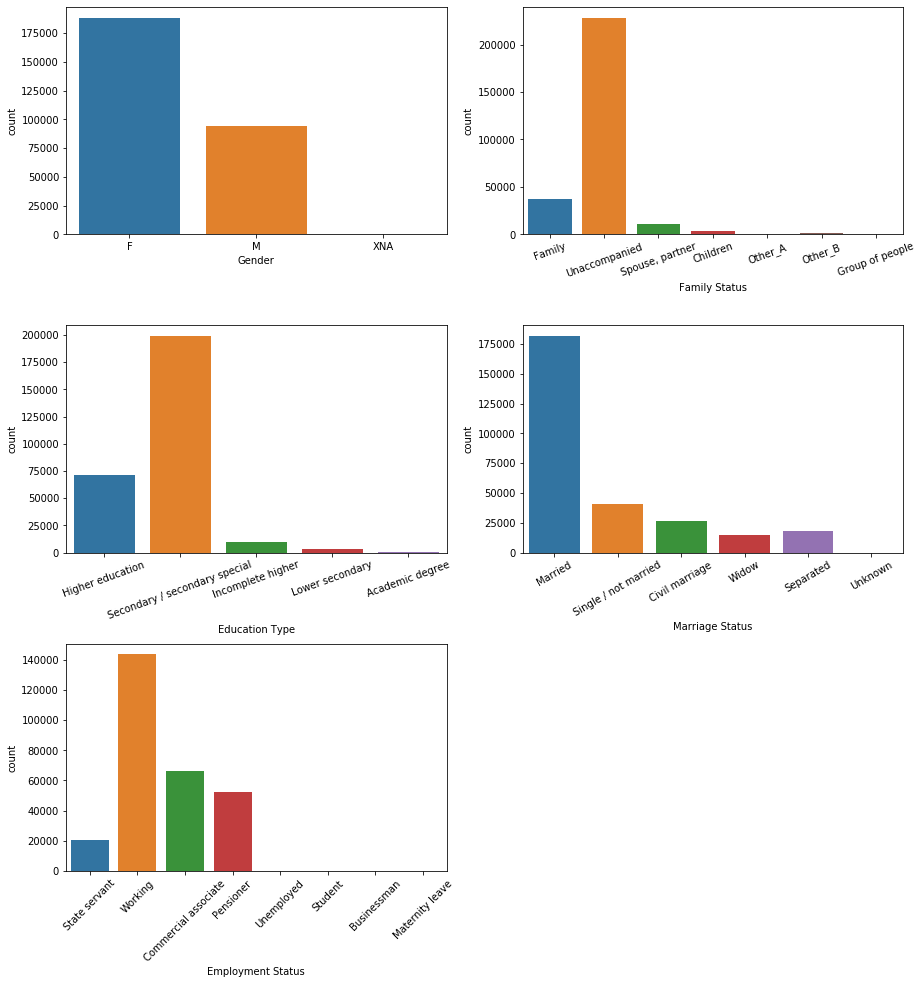

In [40]:
# Bar Plot for Univariate analysis of Categorical Variables

plt.figure(figsize=(15,15))
plt.tight_layout()
plt.subplots_adjust(left = 0.125,right = 0.9,bottom = 0.1,top = 0.9,wspace = 0.2,hspace = 0.4 )

plt.subplot(3,2,1)
sns.countplot(x = 'CODE_GENDER', data  = dataset_for_target_zero)
plt.xlabel("Gender")

plt.subplot(3,2,2)
sns.countplot(x = 'NAME_TYPE_SUITE', data = dataset_for_target_zero)
plt.xticks(rotation = 20)
plt.xlabel("Family Status")

plt.subplot(3,2,3)
sns.countplot(x = 'NAME_EDUCATION_TYPE', data  = dataset_for_target_zero)
plt.xticks(rotation = 20)
plt.xlabel("Education Type")

plt.subplot(3,2,4)
sns.countplot(x = 'NAME_FAMILY_STATUS', data = dataset_for_target_zero)
plt.xticks(rotation = 30)
plt.xlabel("Marriage Status")


plt.subplot(3,2,5)
sns.countplot(x = 'NAME_INCOME_TYPE', data = dataset_for_target_zero)
plt.xticks(rotation = 45)
plt.xlabel("Employment Status")


### Univariate Analysis for Gender :

From the Bar graph plotted for Gender, we can see that the Number of Females are more than Males.
From this we can say that, Female(F) did not have as many issues as Male in returning the loan amount.
We can clearly say that, as women return the loan amount taken on time, their loan should be sanctioned as soon as possible.

### Univariate Analysis for people with different Family Statsus :

By looking at the graph plotted for Family Status, one can clearly say that people those are unaccompanied, tends to return the loan on time.
Hence while approving the loans, status of family can be a key factor as number of family members can increase the spend which inturn impact the loan.

### Univariate Analysis for people with different education background :

People those have Higher / Secondary Education are more in number those are not having issues while returning the loan amount. 
From this we can say that educated people return the loan on time as they know the impact the late payment causes on CIBIL score which is not known to the pople with less education.

### Univariate Analysis for Married :

Its interesting to see that number of people who has taken and returned payment on time are the married people.
Hence it can be said that when married, due to various reasons there is a need for money, say for purchasing homes or Trips.
Hence Relationship status is also important while sanctioning the loans.


### Univariate Analysis for Married :
Working Individuals, Commercial Associate and Pensioners have not defaulted.
Which implies that we can approve loan requests of people with these professionals 

### Overall Result: 

From all the above analysis, we can state that:

1.Look at the Family status, Relationship status,Educatin Type of the applier while giving the loan.As these factors majorly impact the person while returning the loan on time.




C:\Users\ACER\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ACER\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


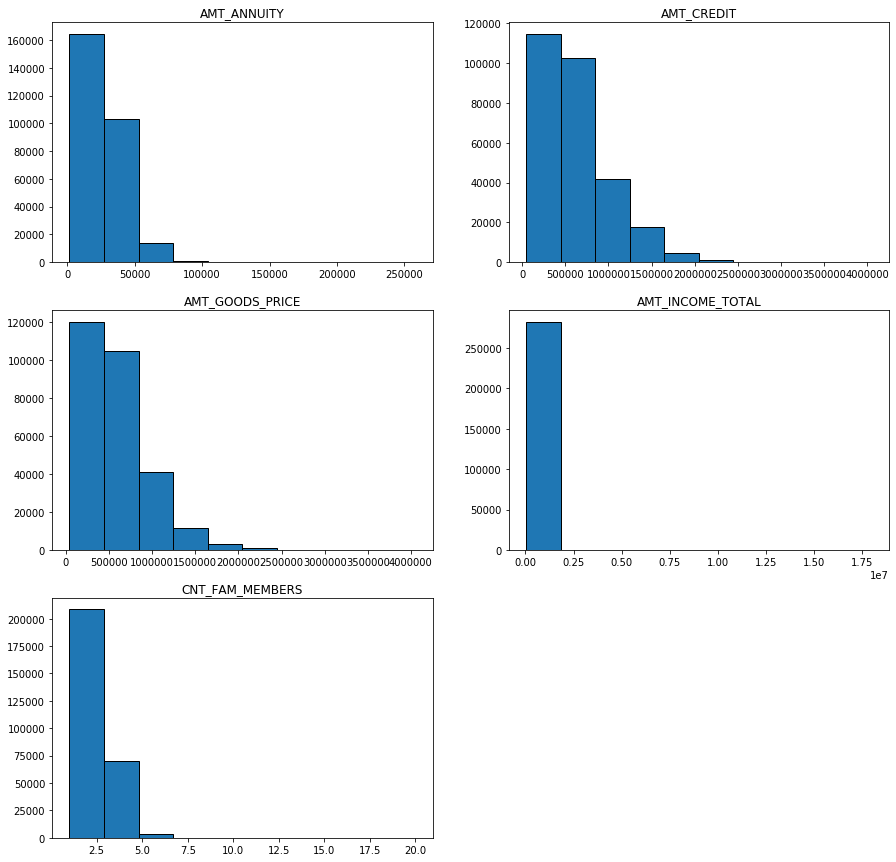

In [41]:
# Matplot:
plt.figure(figsize=(15,15))
features = ['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE','AMT_INCOME_TOTAL','CNT_FAM_MEMBERS']
for i in enumerate(features):
    ax = plt.subplot(3,2, i[0]+1)
    plt.hist(dataset_for_target_zero[i[1]], edgecolor = 'black')
    ax.set_title(i[1])

### Univariate Analysis for Amount Annuity, Amount Credit, Amount Goods Price, Total Income and Count of Family Members : 

Above columns are chosen, because they can influence others values directly.

### Amount Annuity : Loan Annuity  & Amount Credit : Credit Amount of the Loan 

As observed in the graph, these two are directly proportinal amounts. Hence if Ammount annuity is more then Credit amount given is also more.

### Amount Goods Price, Amount Annuity And Amount Income 

All of these fields are directly proporatinal as seen in the graph, 
If one increases other also increases.
Income of individual is more it means he can pay on time and can be given large credit loan without having any issues in returning the payment

#### Bivariate Analysis for Dataframe with TARGET = 0:

Bivariate analysis is basically working on Two or More columns to get insights in to the data.

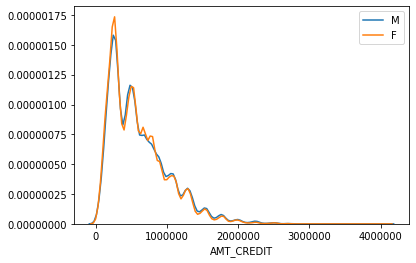

In [42]:
Gender = ['M','F']
for i in Gender:
    subset = dataset_for_target_zero[dataset_for_target_zero['CODE_GENDER']==i]
    sns.distplot(subset['AMT_CREDIT'], hist = False, label=i)

### Bivariate Analysis for Gender and Amount Credit given :

From the above graph plotted for Credit Amount offered to Male and Female, when they have no issues in returning the loan
We can observe that, both are offered the same credit loan with a little spike for Female. Hence it can be said that,while giving out the loans, Genders are not considered.

But as per our previous analysis for Gender, Females return the payment on time, so they should be prioritized.
While giving loan to Men, all other factors must be considered so as to make sure timely payment.


(array([-500000.,       0.,  500000., 1000000., 1500000., 2000000.,
        2500000., 3000000., 3500000., 4000000., 4500000.]),
 <a list of 11 Text xticklabel objects>)

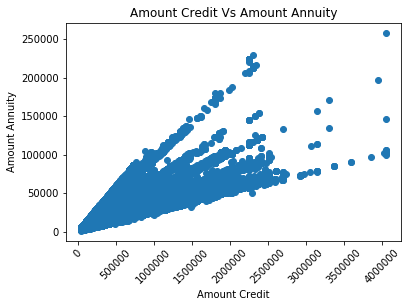

In [43]:
## ScatterPlot for Bi variate analysis
# Amount Credit Vs Amount Annuity
plt.scatter(dataset_for_target_zero['AMT_CREDIT'], dataset_for_target_zero['AMT_ANNUITY'])
plt.title("Amount Credit Vs Amount Annuity")
plt.xlabel("Amount Credit")
plt.ylabel("Amount Annuity")
plt.xticks(rotation = 45)

### Scatter Plot for Amount Credit and Amount Annuity : 

As stated earlier, Amount Annuity and Amount Credit are closely related.
This can be seen from the plot, as Annuity is increasing Credit given is also increasing. 
After 30,00,000, its not densely populated as its below, From this it can be said that people who have been paying on time are having amount credit upto Rs 30,00,000.

Above that limit, credit is given to a little number of people.

(array([-500000.,       0.,  500000., 1000000., 1500000., 2000000.,
        2500000., 3000000., 3500000., 4000000., 4500000.]),
 <a list of 11 Text xticklabel objects>)

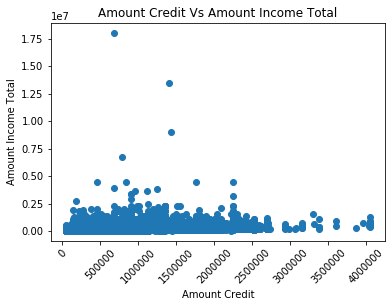

In [44]:
## ScatterPlot for Bi variate analysis
# Amount Credit Vs Amount Income Total
plt.scatter(dataset_for_target_zero['AMT_CREDIT'], dataset_for_target_zero['AMT_INCOME_TOTAL'])
plt.title("Amount Credit Vs Amount Income Total")
plt.xlabel("Amount Credit")
plt.ylabel("Amount Income Total")
plt.xticks(rotation = 45)

(array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
         5000000.]), <a list of 7 Text xticklabel objects>)

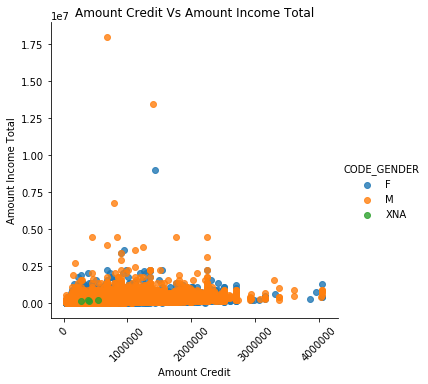

In [45]:
## ScatterPlot for Bi variate analysis
# Amount Credit Vs Amount Income Total

sns.lmplot('AMT_CREDIT', 'AMT_INCOME_TOTAL',
           data= dataset_for_target_zero,
           hue = 'CODE_GENDER' , fit_reg = False)
plt.title("Amount Credit Vs Amount Income Total")
plt.xlabel("Amount Credit")
plt.ylabel("Amount Income Total")
plt.xticks(rotation = 45)

### Analysis for Gender, Amount Credit and Total Income of Individual : 

Amount Credit is the amount offered to a individual after he/she passes all the criterian for Approavl.
From the plot we can see that, individuals having income upto 50k have applier for the loan and are paying it back in time.

So we can increase the credit offered to them as they have not defaulted. This includes both Male and Female.

(array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
         5000000.]), <a list of 7 Text xticklabel objects>)

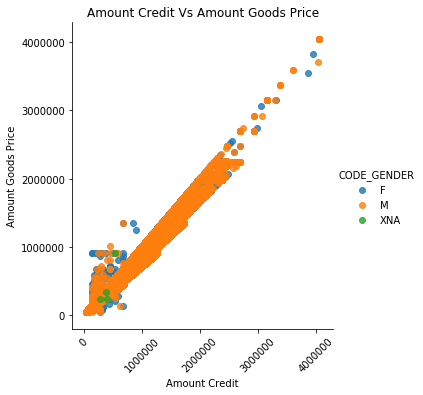

In [46]:
## ScatterPlot for Bi variate analysis
# Amount Credit Vs Amount Income Total

sns.lmplot('AMT_CREDIT', 'AMT_GOODS_PRICE',
           data= dataset_for_target_zero,
           hue = 'CODE_GENDER' , fit_reg = False)
plt.title("Amount Credit Vs Amount Goods Price")
plt.xlabel("Amount Credit")
plt.ylabel("Amount Goods Price")
plt.xticks(rotation = 45)

### Amount Goods Price and Amount Credit : 

Amount Goods price is the price given for the objects that customer is providing ( Like Gold, land, House, etc).
If the price of Goods is high, then credit given to him is also high and it can be seen from the plot. 
In conclusion, these are directly proportional fields.

In [47]:
#Finding correlation of Continuous Columns
#Taking only continuous columns and dropping categorical columns

num = ['int64', 'float64']
newdf = dataset_for_target_zero.select_dtypes(include = num)

## Dropping the target column as it it a categorical column
## Dropping other columns as they do not provide any significant information regarding the loan offering conditions.

newdf.drop(['AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_MON',
           'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_WEEK','DAYS_BIRTH','REGION_POPULATION_RELATIVE',
           'REGION_POPULATION_RELATIVE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
           'FLAG_EMP_PHONE','FLAG_PHONE','SK_ID_CURR','AMT_REQ_CREDIT_BUREAU_HOUR','REG_REGION_NOT_LIVE_REGION'
           ,'REGION_RATING_CLIENT','AMT_REQ_CREDIT_BUREAU_YEAR','EXT_SOURCE_3'],axis = 1, inplace = True)
newdf.head()

C:\Users\ACER\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,CNT_CHILDREN,CNT_FAM_MEMBERS,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,FLAG_EMAIL,FLAG_MOBIL,OBS_30_CNT_SOCIAL_CIRCLE
1,35698.5,1293502.5,1129500.0,270000.0,0,2.0,-1188,-291,-828.0,-1186.0,0,1,1.0
2,6750.0,135000.0,135000.0,67500.0,0,1.0,-225,-2531,-815.0,-4260.0,0,1,0.0
3,29686.5,312682.5,297000.0,135000.0,0,2.0,-3039,-2437,-617.0,-9833.0,0,1,2.0
4,21865.5,513000.0,513000.0,121500.0,0,1.0,-3038,-3458,-1106.0,-4311.0,0,1,0.0
5,27517.5,490495.5,454500.0,99000.0,0,2.0,-1588,-477,-2536.0,-4970.0,0,1,0.0


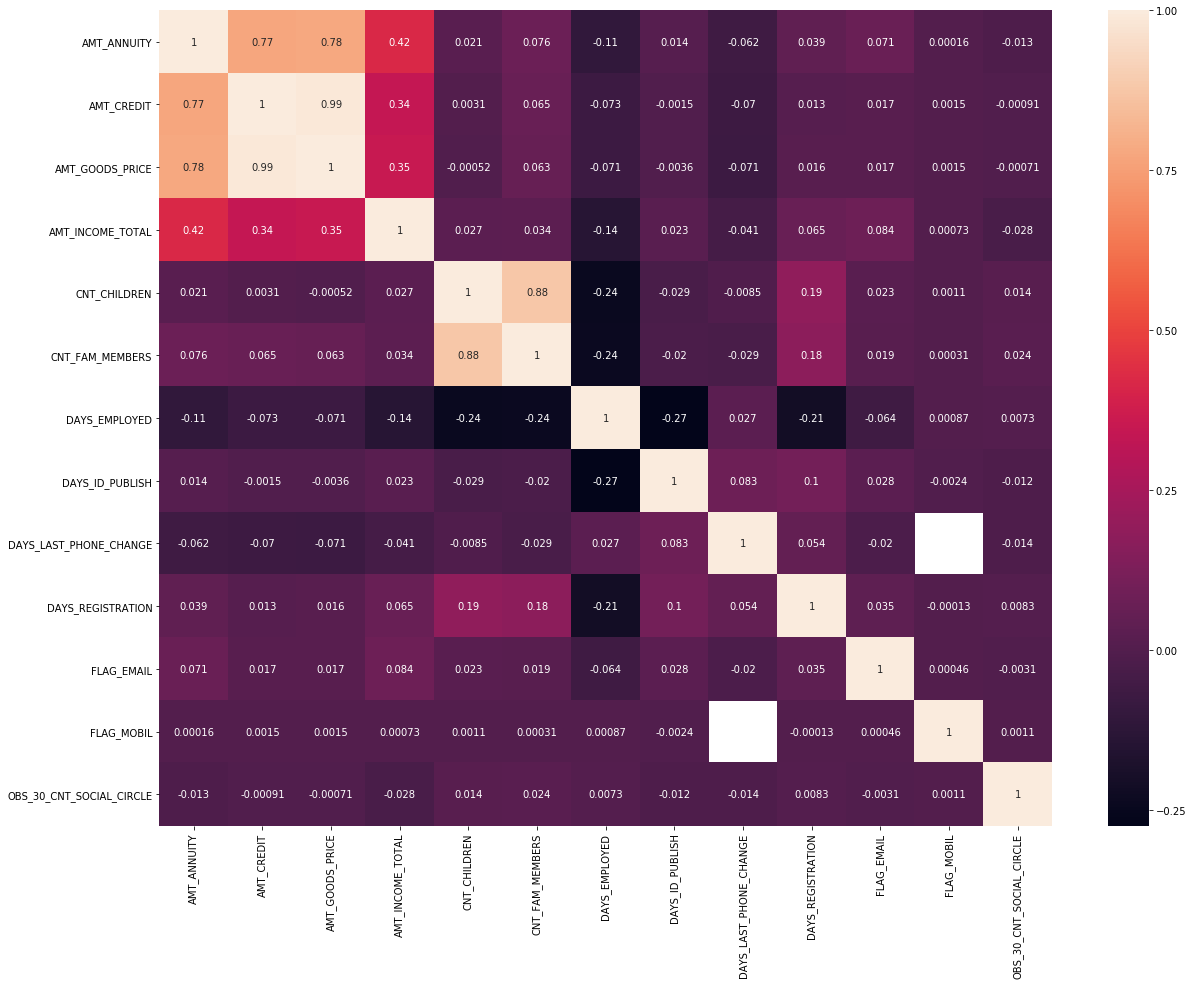

In [48]:
corr_mat = newdf.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr_mat, annot =True)

In [49]:
# Get a list of highly correlated variable
corr_mat = newdf.corr()
corr = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))
corr = corr.abs().unstack().reset_index()
corr.columns = ['VAR1', 'VAR2', 'CORR']
corr.dropna(subset = ['CORR'], inplace = True)
corr.sort_values('CORR', ascending = False)

,VAR1,VAR2,CORR
27,AMT_GOODS_PRICE,AMT_CREDIT,0.987250
69,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571
26,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686
13,AMT_CREDIT,AMT_ANNUITY,0.771309
39,AMT_INCOME_TOTAL,AMT_ANNUITY,0.418953
41,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,0.349462
40,AMT_INCOME_TOTAL,AMT_CREDIT,0.342799
97,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.274290
82,DAYS_EMPLOYED,CNT_CHILDREN,0.243356
83,DAYS_EMPLOYED,CNT_FAM_MEMBERS,0.237413


### Correlation / Bivariate Analysis for Target = 0

As concluded earlier, Amount Goods Price and Credit Amount are highly correlated with a 0.98 value
Then Amount Goods Price and Amount Annuity with 0.77 value.
Then Amount Income Total and Credit Amount with 0.34 Value.

(All these are selected by observing relation between columns)

All the highly correlated variables can be seen in above table.

### Univrariate Analysis for Dataframe with TARGET = 1

Text(0.5, 0, 'Employment Status')

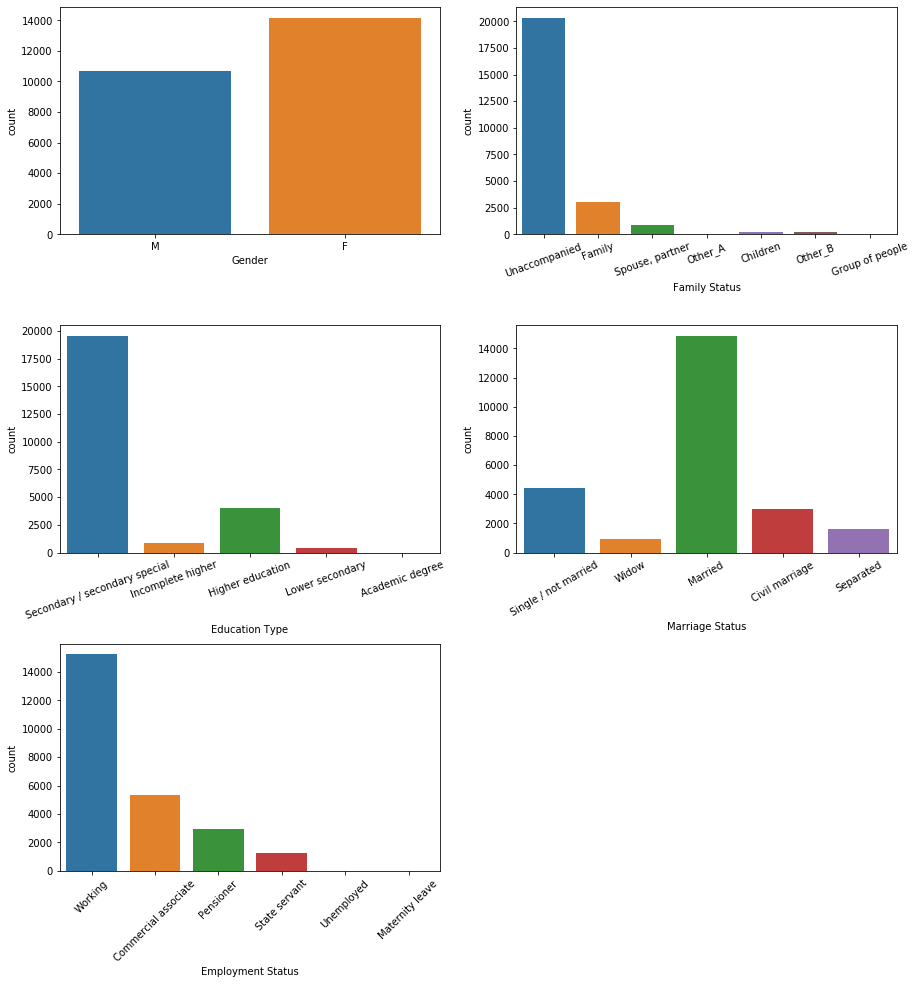

In [50]:
# Bar Plot for Univariate analysis of Categorical Variables

plt.figure(figsize=(15,15))
plt.tight_layout()
plt.subplots_adjust(left = 0.125,right = 0.9,bottom = 0.1,top = 0.9,wspace = 0.2,hspace = 0.4 )

plt.subplot(3,2,1)
sns.countplot(x = 'CODE_GENDER', data  = dataset_for_target_one)
plt.xlabel("Gender")

plt.subplot(3,2,2)
sns.countplot(x = 'NAME_TYPE_SUITE', data = dataset_for_target_one)
plt.xticks(rotation = 20)
plt.xlabel("Family Status")

plt.subplot(3,2,3)
sns.countplot(x = 'NAME_EDUCATION_TYPE', data  = dataset_for_target_one)
plt.xticks(rotation = 20)
plt.xlabel("Education Type")

plt.subplot(3,2,4)
sns.countplot(x = 'NAME_FAMILY_STATUS', data = dataset_for_target_one)
plt.xticks(rotation = 30)
plt.xlabel("Marriage Status")


plt.subplot(3,2,5)
sns.countplot(x = 'NAME_INCOME_TYPE', data = dataset_for_target_one)
plt.xticks(rotation = 45)
plt.xlabel("Employment Status")


### Univariate Analysis for Gender :

From the Bar graph plotted for Gender, we can see that the Number of Females are more than Males.
From this we can say that, Female(F) had issued in returning the loan amount.
But as per our earlier analysis for Target = 0, Females returned the loan on Time also. 
Hence we need to verify the conditions that individual is in and the other factors such as Family Status, Relationship status, Income and Education.

For Men, they are in lower number and had issues in returning the loan but not as much compared to women.

### Univariate Analysis for people with different Family Statsus :

By looking at the graph plotted for Family Status, one can clearly say that people those are unaccompanied, had issues in returning the loan.
This is in contrast to the findings from Target = 0 becasue there also Unaccompanied Individuals returned loan on Time.
So we can say that, deeper analysis is reuqired to get more insights.



### Univariate Analysis for Married :

Married people are more in number here those defaulted, reason can be income status or other personal issues.
But the number of appliers those are married is more in both the cases.
Which indicates Married People must be given priority as they will need more and more loan as time passes.

### Overall Result: 

From all the above analysis, we can state that:

1.Some of the results are in contrast ( target = 0  VS target = 1) 
2.While sanctioning the loans, check for all the related parameters.


C:\Users\ACER\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ACER\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


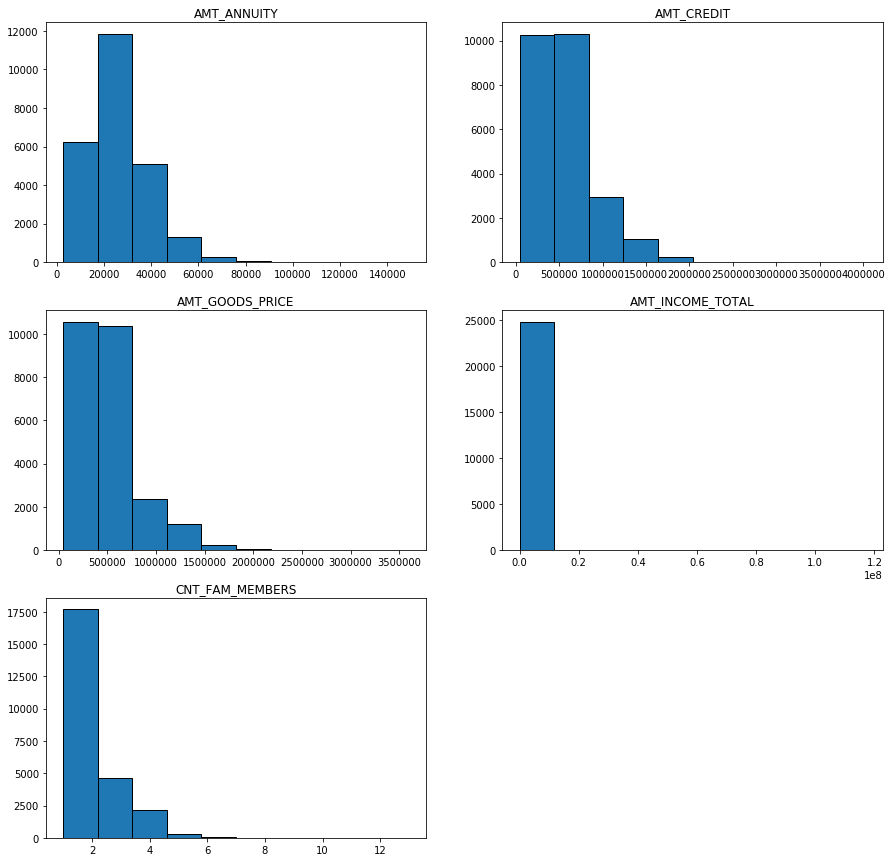

In [51]:
# Matplot:
plt.figure(figsize=(15,15))
features = ['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE','AMT_INCOME_TOTAL','CNT_FAM_MEMBERS']
for i in enumerate(features):
    ax = plt.subplot(3,2, i[0]+1)
    plt.hist(dataset_for_target_one[i[1]], edgecolor = 'black')
    ax.set_title(i[1])

### Univariate Analysis for Amount Annuity, Amount Credit, Amount Goods Price, Total Income and Count of Family Members : 

Above columns are chosen, because they can influence others values directly.

### Amount Annuity : Loan Annuity  & Amount Credit : Credit Amount of the Loan 

As observed in the graph, these two are directly proportinal amounts. Hence if Ammount annuity is more then Credit amount given is also more.

### Amount Goods Price, Amount Annuity And Amount Income 

All of these fields are directly proporatinal as seen in the graph, 
If one increases other also increases.
Income of individual is more it means he can pay on time and can be given large credit loan without having any issues in returning the payment

### In Comparison with Target = 0

All the columns are correlated to each other for Target = 1. Same was observed in Target = 0.

#### Bivariate Analysis for Dataframe with TARGET = 1 :


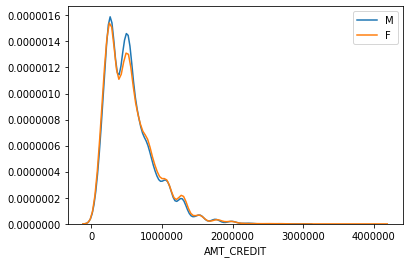

In [52]:
Gender = ['M','F']
for i in Gender:
    subset = dataset_for_target_one[dataset_for_target_one['CODE_GENDER']==i]
    sns.distplot(subset['AMT_CREDIT'], hist = False, label=i)

Text(0, 0.5, 'Amount Annuity')

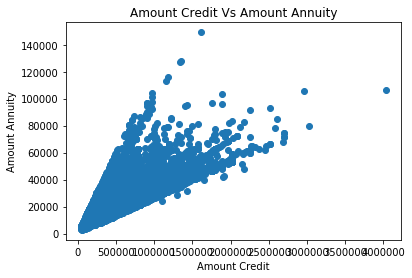

In [53]:
## ScatterPlot for Bi variate analysis
# Amount Credit Vs Amount Annuity
plt.scatter(dataset_for_target_one['AMT_CREDIT'], dataset_for_target_one['AMT_ANNUITY'])
plt.title("Amount Credit Vs Amount Annuity")
plt.xlabel("Amount Credit")
plt.ylabel("Amount Annuity")

(array([-500000.,       0.,  500000., 1000000., 1500000., 2000000.,
        2500000., 3000000., 3500000., 4000000., 4500000.]),
 <a list of 11 Text xticklabel objects>)

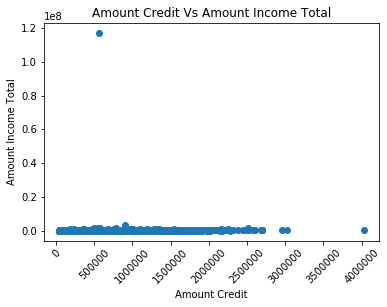

In [54]:
## ScatterPlot for Bi variate analysis
# Amount Credit Vs Amount Income Total
plt.scatter(dataset_for_target_one['AMT_CREDIT'], dataset_for_target_one['AMT_INCOME_TOTAL'])
plt.title("Amount Credit Vs Amount Income Total")
plt.xlabel("Amount Credit")
plt.ylabel("Amount Income Total")
plt.xticks(rotation = 45)

(array([-500000.,       0.,  500000., 1000000., 1500000., 2000000.,
        2500000., 3000000., 3500000., 4000000., 4500000.]),
 <a list of 11 Text xticklabel objects>)

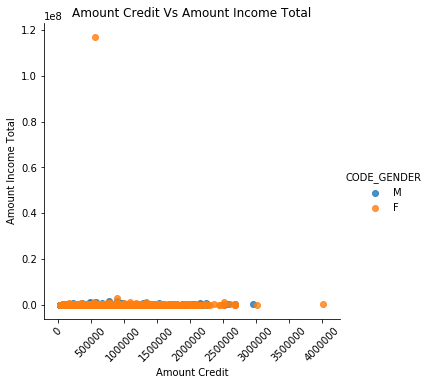

In [55]:
## ScatterPlot for Bi variate analysis
# Amount Credit Vs Amount Income Total

sns.lmplot('AMT_CREDIT', 'AMT_INCOME_TOTAL',
           data= dataset_for_target_one,
           hue = 'CODE_GENDER' , fit_reg = False)
plt.title("Amount Credit Vs Amount Income Total")
plt.xlabel("Amount Credit")
plt.ylabel("Amount Income Total")
plt.xticks(rotation = 45)

(array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
         5000000.]), <a list of 7 Text xticklabel objects>)

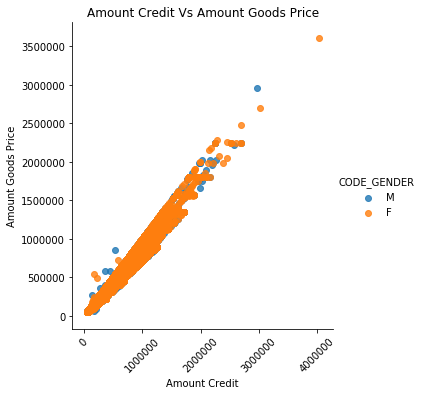

In [56]:
## ScatterPlot for Bi variate analysis
# Amount Credit Vs Amount Income Total

sns.lmplot('AMT_CREDIT', 'AMT_GOODS_PRICE',
           data= dataset_for_target_one,
           hue = 'CODE_GENDER' , fit_reg = False)
plt.title("Amount Credit Vs Amount Goods Price")
plt.xlabel("Amount Credit")
plt.ylabel("Amount Goods Price")
plt.xticks(rotation = 45)

In [57]:
#Finding correlation of Continuous Columns
#Taking only continuous columns and dropping categorical columns

num = ['int64', 'float64']
newdf = dataset_for_target_one.select_dtypes(include = num)
newdf.drop(['AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_MON',
           'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_WEEK','DAYS_BIRTH','REGION_POPULATION_RELATIVE',
           'REGION_POPULATION_RELATIVE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
           'FLAG_EMP_PHONE','FLAG_PHONE','SK_ID_CURR','AMT_REQ_CREDIT_BUREAU_HOUR','REG_REGION_NOT_LIVE_REGION'
           ,'REGION_RATING_CLIENT','AMT_REQ_CREDIT_BUREAU_YEAR','EXT_SOURCE_3'],axis = 1, inplace = True)
newdf.head()

C:\Users\ACER\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,CNT_CHILDREN,CNT_FAM_MEMBERS,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,FLAG_EMAIL,FLAG_MOBIL,OBS_30_CNT_SOCIAL_CIRCLE
0,24700.5,406597.5,351000.0,202500.0,0,1.0,-637,-2120,-1134.0,-3648.0,0,1,2.0
26,27076.5,979992.0,702000.0,112500.0,0,1.0,-2628,-1827,-161.0,-6573.0,0,1,10.0
40,35028.0,1193580.0,855000.0,202500.0,0,2.0,-1262,-1029,-1075.0,-1182.0,0,1,0.0
42,16258.5,288873.0,238500.0,135000.0,0,2.0,-3597,-4409,-1480.0,-45.0,0,1,1.0
81,14593.5,252000.0,252000.0,81000.0,0,2.0,365243,-4199,0.0,-5391.0,0,1,1.0


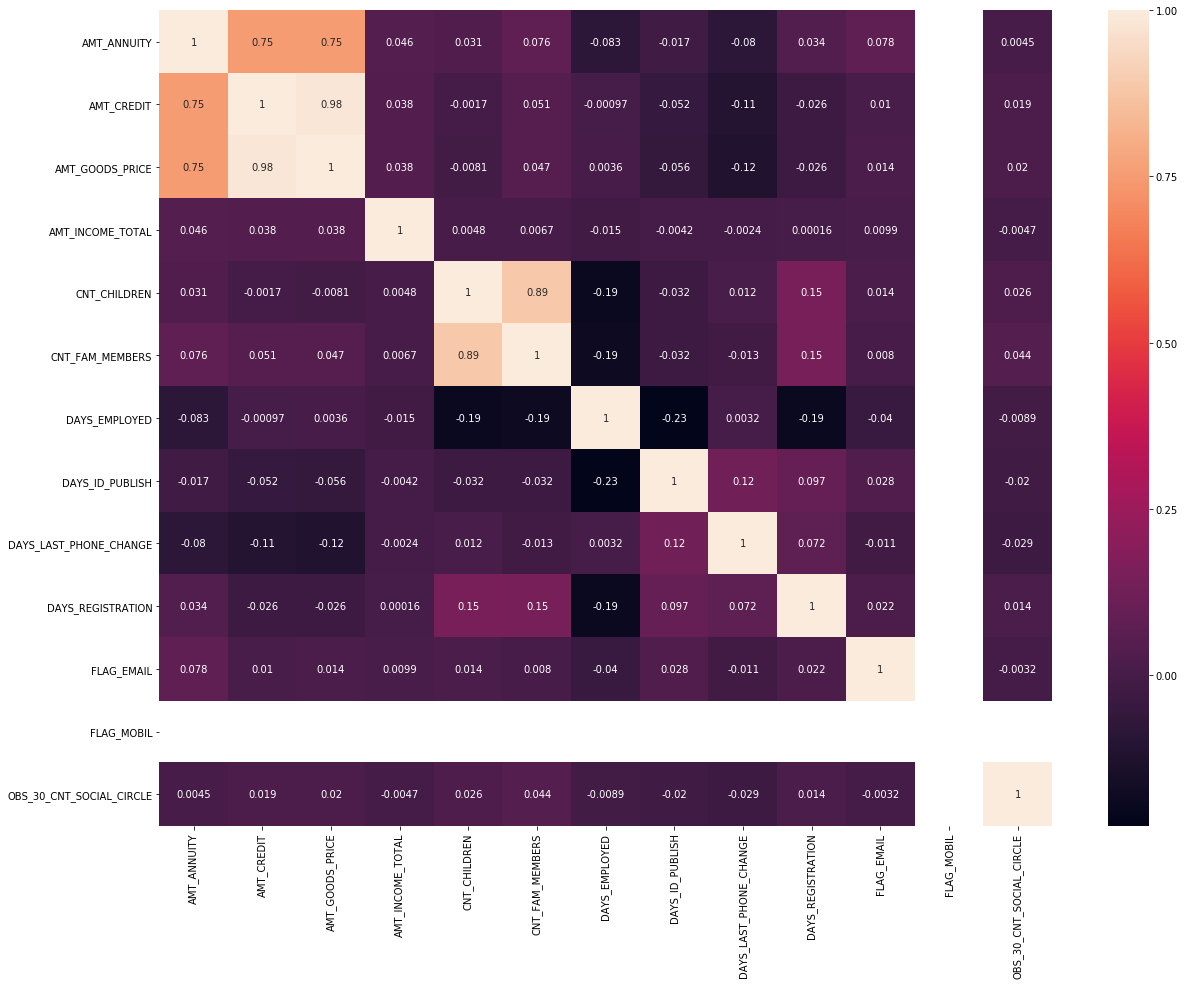

In [58]:
corr_mat = newdf.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr_mat, annot =True)

In [59]:
# Get a list of highly correlated variable
corr_mat = newdf.corr()
corr = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))
corr = corr.abs().unstack().reset_index()
corr.columns = ['VAR1', 'VAR2', 'CORR']
corr.dropna(subset = ['CORR'], inplace = True)
corr.sort_values('CORR', ascending = False)

,VAR1,VAR2,CORR
27,AMT_GOODS_PRICE,AMT_CREDIT,0.983103
69,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484
26,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699
13,AMT_CREDIT,AMT_ANNUITY,0.752195
97,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.226470
82,DAYS_EMPLOYED,CNT_CHILDREN,0.191942
123,DAYS_REGISTRATION,DAYS_EMPLOYED,0.188929
83,DAYS_EMPLOYED,CNT_FAM_MEMBERS,0.186561
121,DAYS_REGISTRATION,CNT_CHILDREN,0.149154
122,DAYS_REGISTRATION,CNT_FAM_MEMBERS,0.145828


### Correlation / Bivariate Analysis for Target = 1


For Target =1 also, Amount Goods Price and Credit Amount are highly correlated with a 0.98 value
Then Amount Goods Price and Amount Annuity with 0.77 value.
Then Amount Income Total and Credit Amount with 0.34 Value.

(All these are selected by observing relation between columns)

All the highly correlated variables can be seen in above table.


### Correlation for Target = 0 & Target = 1

All the highly related columns those were observed in Target = 0 are found in correlation for Target = 1.
Hence we can say that, there was no distinguishing factor while sanctioning the loans.
People defaulted after sanctioning the loans.

### merging data together :

#### There are more than 1.6 million records. which is slowing down the entire analysis process. We will take a slice of this data equivalent to Current Loan file.

In [73]:
loan_previous = pd.read_csv('previous_application.csv',nrows=300000)
loan_previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
loan_previous.shape

(300000, 37)

In [76]:
columnsToDrop = ['AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED','NAME_TYPE_SUITE','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL']

In [77]:
loan_previous = loan_previous.drop(columnsToDrop, axis = 1)

In [78]:
### These are the columns available in Primary application form. 
### We will keep only these columns in both file for comparision

applicationsData_relevant_merge = applicationsData_relevant[['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 
                                                             'AMT_CREDIT', 'AMT_GOODS_PRICE','CODE_GENDER',
                                                             'OCCUPATION_TYPE','ORGANIZATION_TYPE',
                                                             'NAME_CONTRACT_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
                                                               'WEEKDAY_APPR_PROCESS_START' ]]


In [79]:
# Adding prefix "loanPrev" to all column names in data frame to distinguish columns after merging
loan_previous = loan_previous.add_prefix('loanPrev_')
loan_previous.head()

,loanPrev_SK_ID_PREV,loanPrev_SK_ID_CURR,loanPrev_NAME_CONTRACT_TYPE,loanPrev_AMT_ANNUITY,loanPrev_AMT_APPLICATION,loanPrev_AMT_CREDIT,loanPrev_AMT_GOODS_PRICE,loanPrev_WEEKDAY_APPR_PROCESS_START,loanPrev_HOUR_APPR_PROCESS_START,loanPrev_FLAG_LAST_APPL_PER_CONTRACT,loanPrev_NFLAG_LAST_APPL_IN_DAY,loanPrev_NAME_CASH_LOAN_PURPOSE,loanPrev_NAME_CONTRACT_STATUS,loanPrev_DAYS_DECISION,loanPrev_NAME_PAYMENT_TYPE,loanPrev_CODE_REJECT_REASON,loanPrev_NAME_CLIENT_TYPE,loanPrev_NAME_GOODS_CATEGORY,loanPrev_NAME_PORTFOLIO,loanPrev_NAME_PRODUCT_TYPE,loanPrev_CHANNEL_TYPE,loanPrev_SELLERPLACE_AREA,loanPrev_NAME_SELLER_INDUSTRY,loanPrev_CNT_PAYMENT,loanPrev_NAME_YIELD_GROUP,loanPrev_PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [80]:
# Using inner join to merge the two data sets using SK_ID_CURR as key
loan_merged_data = pd.merge(left = applicationsData_relevant_merge,
                           right = loan_previous,
                           left_on = 'SK_ID_CURR',
                           right_on = 'loanPrev_SK_ID_CURR')


### Univariate Analysis for merged dataframe with Target = 0

Text(0.5, 0, 'Goods Category')

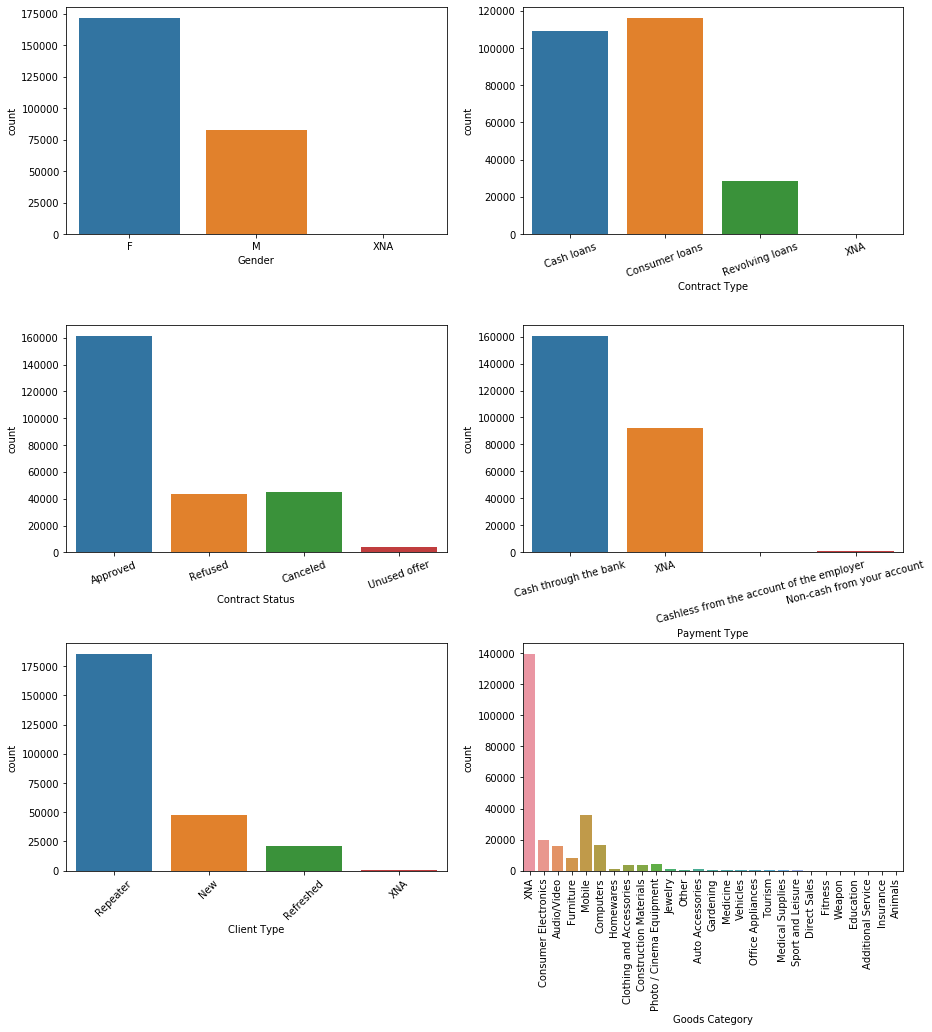

In [81]:
# Bar Plot for Univariate analysis of Categorical Variables

plt.figure(figsize=(15,15))
plt.tight_layout()
plt.subplots_adjust(left = 0.125,right = 0.9,bottom = 0.1,top = 0.9,wspace = 0.2,hspace = 0.4 )

plt.subplot(3,2,1)
sns.countplot(x = 'CODE_GENDER', data  = loan_merged_data)
plt.xlabel("Gender")

plt.subplot(3,2,2)
sns.countplot(x = 'loanPrev_NAME_CONTRACT_TYPE', data = loan_merged_data)
plt.xticks(rotation = 20)
plt.xlabel("Contract Type")

plt.subplot(3,2,3)
sns.countplot(x = 'loanPrev_NAME_CONTRACT_STATUS', data  = loan_merged_data)
plt.xticks(rotation = 20)
plt.xlabel("Contract Status")

plt.subplot(3,2,4)
sns.countplot(x = 'loanPrev_NAME_PAYMENT_TYPE', data = loan_merged_data)
plt.xticks(rotation = 15)
plt.xlabel("Payment Type")


plt.subplot(3,2,5)
sns.countplot(x = 'loanPrev_NAME_CLIENT_TYPE', data = loan_merged_data)
plt.xticks(rotation = 45)
plt.xlabel("Client Type")

plt.subplot(3,2,6)
sns.countplot(x = 'loanPrev_NAME_GOODS_CATEGORY', data = loan_merged_data)
plt.xticks(rotation = 90)
plt.xlabel("Goods Category")

### Univariate Analysis for Categorical Variables in Merged Dataset

#### Univariate Analysis for Gender 

When the graph is observed, it seems that number of Female's those have applied for the loan are more than the number of Male's.
Reason behind this can be Female's have not defaulted as much as Men's have.
Taking this trend in to consideration, Females's can be given more offers in Loan and their loan applications can be approved ASAP.


#### Univariate Analysis for Payment  Type

Number of individuals those have taken cash directly is way more than any other transactions.


#### Univariate Analysis for Contract Status 

Number of loan applications those are approved are more than Rejected or Cancelled applications. 
From this we can say that, applications needs to be checked thoroughly before approving.


####  Univariate Analysis for Client Type 

Repeater Consumers are more in number than New or Refreshed. This indicates that people ahave applied for new loans which means they have not defaulted during the previous loan payment process. 
This can be a key factor in deciding the approval process. 


C:\Users\ACER\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ACER\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


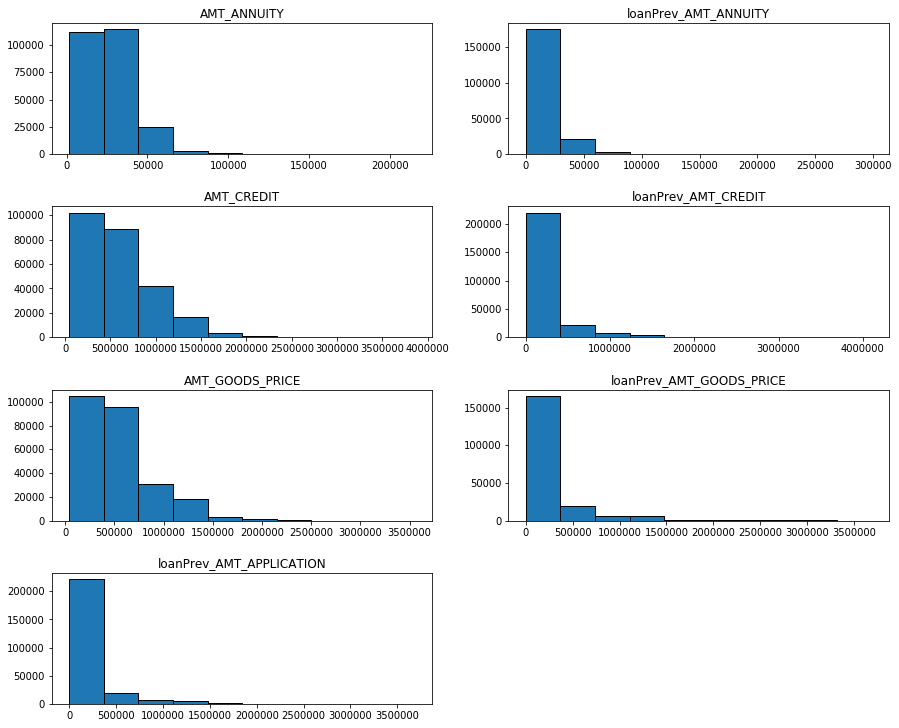

In [82]:
# Matplot:
plt.figure(figsize=(15,15))
plt.tight_layout()
plt.subplots_adjust(left = 0.125,right = 0.9,bottom = 0.1,top = 0.9,wspace = 0.2,hspace = 0.4 )
features = ['AMT_ANNUITY', 'loanPrev_AMT_ANNUITY', 'AMT_CREDIT', 'loanPrev_AMT_CREDIT',
            'AMT_GOODS_PRICE','loanPrev_AMT_GOODS_PRICE','loanPrev_AMT_APPLICATION']
for i in enumerate(features):
    ax = plt.subplot(5,2, i[0]+1)
    plt.hist(loan_merged_data[i[1]], edgecolor = 'black')
    ax.set_title(i[1])

### Univariate Analysis for Continuous Variables 

#### Amount Annuity VS Amount Annuity for Previous Application

    When these two columns are plotted , it indicates that there is not much change in the Amount Annuity provided for the consumers.

#### Amount Credit VS Amount Credit for previous Application 

Same observation applies for these columns. 

### Bivariate Analysis 

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

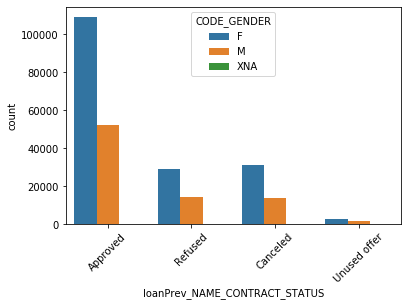

In [83]:
## Cat-cat variables

sns.countplot(x = 'loanPrev_NAME_CONTRACT_STATUS', hue = 'CODE_GENDER', data = loan_merged_data)
plt.xticks(rotation = 45)

### Bivariate analysis between Gender and Status of Applications :

As we stated earlier, number of Female's those have applied for loan applications are more than Male's
Same observation is valid here. 
From the above bar graph we can say that, approved applications are more for Female's more than Male's

Female applications are more in number in all the status.

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

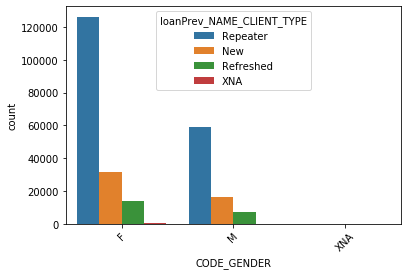

In [84]:
## Cat-cat variables

sns.countplot(x = 'CODE_GENDER', hue = 'loanPrev_NAME_CLIENT_TYPE', data = loan_merged_data)
plt.xticks(rotation = 45)

### Plotting Gender Vs Client Type

After plotting two categorical variables, we can see that repeat consumers are in more numbers for Male and Female.
It signifies that consumers reapply for loans once its declined or they need a new loan. 
We can choose to approve these repeaters as they have completed payment for their previous loan amounts.

After Repeaters, New Loan consumers can be prioritizes as they will not default as they will think about maintaining CIBIL score.

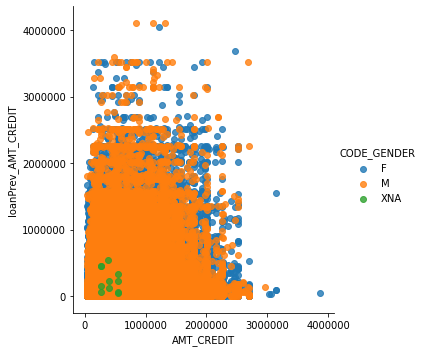

In [85]:
# Cat vs cont
sns.lmplot('AMT_CREDIT','loanPrev_AMT_CREDIT', data = loan_merged_data, hue = 'CODE_GENDER' , fit_reg = False)

In [86]:
# Mutivariate Analysis
# Two Continuous columns

num = ['int64', 'float64']
newdf = loan_merged_data.select_dtypes(include = num)
newdf.head()

,SK_ID_CURR,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,loanPrev_SK_ID_PREV,loanPrev_SK_ID_CURR,loanPrev_AMT_ANNUITY,loanPrev_AMT_APPLICATION,loanPrev_AMT_CREDIT,loanPrev_AMT_GOODS_PRICE,loanPrev_HOUR_APPR_PROCESS_START,loanPrev_NFLAG_LAST_APPL_IN_DAY,loanPrev_DAYS_DECISION,loanPrev_SELLERPLACE_AREA,loanPrev_CNT_PAYMENT
0,100006,29686.5,312682.5,297000.0,2078043,100006,24246.000,675000.0,675000.0,675000.0,15,1,-181,-1,48.0
1,100007,21865.5,513000.0,513000.0,2001242,100007,16509.600,180000.0,180000.0,180000.0,14,1,-865,1200,18.0
2,100007,21865.5,513000.0,513000.0,2730157,100007,13010.985,225000.0,284400.0,225000.0,13,1,-867,4,48.0
3,100009,41301.0,1560726.0,1395000.0,1413109,100009,8996.760,98239.5,98239.5,98239.5,18,1,-449,164,12.0
4,100011,33826.5,1019610.0,913500.0,2668005,100011,NaN,0.0,0.0,0.0,9,1,-1162,-1,NaN


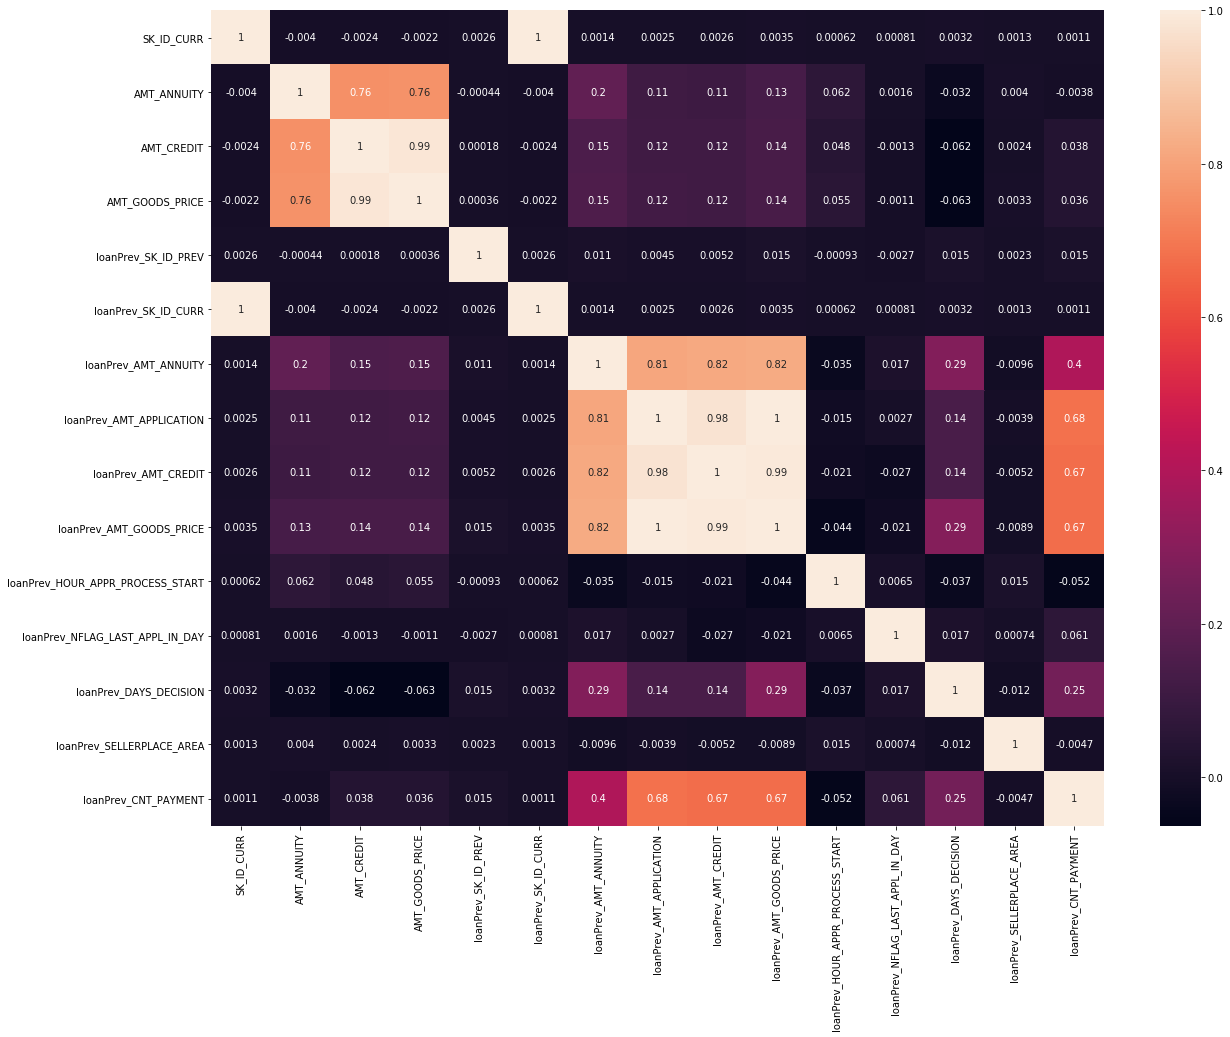

In [87]:
corr_mat = newdf.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr_mat, annot =True)

In [88]:
# Get a list of highly correlated variable
corr_mat = newdf.corr()
corr = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))
corr = corr.abs().unstack().reset_index()
corr.columns = ['VAR1', 'VAR2', 'CORR']
corr.dropna(subset = ['CORR'], inplace = True)
corr.sort_values('CORR', ascending = False)

,VAR1,VAR2,CORR
75,loanPrev_SK_ID_CURR,SK_ID_CURR,1.000000
142,loanPrev_AMT_GOODS_PRICE,loanPrev_AMT_APPLICATION,0.999843
143,loanPrev_AMT_GOODS_PRICE,loanPrev_AMT_CREDIT,0.993348
47,AMT_GOODS_PRICE,AMT_CREDIT,0.986284
127,loanPrev_AMT_CREDIT,loanPrev_AMT_APPLICATION,0.976027
141,loanPrev_AMT_GOODS_PRICE,loanPrev_AMT_ANNUITY,0.823540
126,loanPrev_AMT_CREDIT,loanPrev_AMT_ANNUITY,0.819092
111,loanPrev_AMT_APPLICATION,loanPrev_AMT_ANNUITY,0.811492
46,AMT_GOODS_PRICE,AMT_ANNUITY,0.762180
31,AMT_CREDIT,AMT_ANNUITY,0.758889


### Correlation ( Bivariate Analysis) 

From the Heatmap and table, we can see that Goods Price and Amount Applications are highly correlated with 0.9998 value
followed by Goods price correlated with Amount credit for previous applications.

Same trend can be seen for current applications as Goods Price is correlated with Amount credit with a value of 0.9864.
